# Further Regression Analyses
## Summary and Initial Investigation Recap
The Initial Regression investigation showed that the best results were found with the non-sampled stemmatized reviews which were vectorized with the Term Frequency-Inverse Document Frequency (TFIDF) method. 

Regression was measured using the LinearRegression model only and the best prediction of the test sample provided by this data included the following scores:
* Coefficient: 0.755
* R Squared Value: 0.612
* P Value: 0 to at least 5dp
* Precision: 0.39
* F1 Score: 0.34
* Geometric Mean: 0.52

These scores are not good enough to accurately provide a sentiment analysis of the reviews, but the P Value is very promising.

The initial Analysis also revealed that the text data could be adjusted to fit the overall star rating from 1-5, however the final results must be cut into values of 1 to 5 integers otherwise the errors contained in the float decimal skew the regression error metrics like the geometric mean. It was also observed that the predicted values were not contained within the 1 - 5 bounds and a small amount of values drifted beyond ±10.

The data was unbalanced, and due to the quantity of reviews available only under sampling resampling was attempted on the training data, however the resampled data had a negative impact on all scores.

## Hypothesis
The Initial Regression Analysis P Value indicates that there is indeed a correlation between the reviews and the review rating scores from 1-5, since the linear regression model did not provide satisfactory scores the correlation may not be linear.

The resampling was not sufficient in the Initial exploration, however we can clearly see that the datset is imbalanced with 71.9% of the values falling in 1 and 5. Due to the amount of data only under sampling was implemented, however by reducing the size of the training set other sampling methods could be implemented. Of course different sampling methods may affect the data differently, so it may be necessary to lemmatize and stemmatize the original texts for different methods. Similarly different models may provide better scores with the vectorization methods.

By implementing pipelines and GridSearchCV, several regression models can be tested quickly and return the best scores and parameters for each model can be returned. In this notebook the data will be lemmatized, stemmatized, CountVectorized and TFIDF Vectorized as before. In addition the training set will be halved and RandomOverSampling, Synthetic Minority Over-sampling (SMOTE) and CentroidCluster resampling techniques will be implemented alongside RandomUndersampling. Finally Regression analyses will be performed by fitting and predicting data using Lasso, Ridge, ElasticNet and HistGradientBoostingRegressor models.

HistGradientBoostingRegressor (HGBR) is a better choice than the standard GradientBoostingRegressor (GBR) due to its histogram design aimed at larger datasets with over 10k datapoints. It also utilizes OpenMP for parellelization, allowing much more CPU power to contribute to the modelling and resulting in much faster results than the GradientBoostingRegressor which is restrcited to 1 core. At 446 minute runtime for the main HGBR parameter test, the advantages of parellelization are significant in comparison to GBR, which would probably still be running by the time the Project timeline ends.

It may be that the data is better suited to Classification than Regression, and so whilst this document is prepared to analyse Regression a second notebook is being prepared to model the data with classification.

It is expected that stemmatized, TFIDF Vectorized data will give the strongest correlation based on the results of the initial investigation. It is assumed that the word vectors will be related in several dimensions, so it is expected that the Centroid Clustering method will yield a better regression, especially when paired with a regression model that increases regression through boosting or L1/L2 feature selection.

## Method
Initially the notebook attempted to use pipelines and custom functions to enable multiple successive tests. After significant testing, pipelines were abandoned for custom functions and a custom looping function to chain functions together. This is apparent in certain functions where the implementation is clearly designed for pipeline implementation.  

The Sampling Methods are separated out to maintain reasonable function runtimes. Regressors with multiple argument parameters to be tested will be initially tested on what will be referred to as basic sampling methods. These include No sampling, RandomOverSampling and RandomUnderSampling, these are so called basic, because they are implemented without any argument parameters being adjusted. The best regression partameters from the basic sampling will be used in the more complex sampling methods to again reduce runtimes.

All Models are run through GridSearchCV modelling, which will automatically split the data into train, test samples and records a mean score for each score specified. As a guiding rule, cv will be set to 5 to create 5 splits in the data and produce a reliable cross validation of the regression score. In this sense, the scores may differ from the initial investigation, where the data was split into test and train data and only directly tested without cross validation.

## Linear Regression Results
### Basic Samplers
Cross validating the Linear Regression results revealed significantly worse scores than the initial investigation.
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and TFIDF Vectorization.
### SMOTE Sampler
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. 1000 k neighbors gave the best results.
#### k neighbor comparisons
![Graph showing LinearRegression smote sampling k neighbor mean accuracy result](..\images\lr_smote_k_neighbors.png)
### CentroidCluster Sampler
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. The number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error indicate that the clustering method has destroyed the regression.

#### n_clusters Centroid Cluster comparisons
![Graph showing LinearRegression CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\lr_cc_n_clusters.png)

| Resampling | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 49.6% | 38.7% | 49.6% | 34.6% | 0.249 | 1.60 |
| SMOTE | 50.2% | 39.3% | 50.2% | 35.2% | 0.253 | 1.57 |
| CentroidClusters | 30.0% | 21.6% | 30.0% | 12.4% | -7.68 | 3.52 |

## Lasso L1 Regression Results
### Basic Samplers
The best basic sampler results were produced without resampling, using lemmatization and CountVector Vectorization.  
The lasso alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. There was a distinct reduction in the mean accuracy as the alpha value increased, though no results were particularly impressive. The greatest alpha 0.001 was selected by analysing the graph below and taken forward to further sampling analysis.  
#### Lasso alpha parameter comparisons  
![Graph showing Lasso alpha parameter mean accuracy results](..\images\lasso_alphas.png)
  
### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy.  
#### k neighbor comparisons
![Graph showing Lasso smote sampling k neighbor mean accuracy result](..\images\lasso_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Like the LinearRegression Model, the number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error are as bad as the cluster Linear regression, indicating that there is no linearity present.  
#### n_clusters Centroid Cluster comparisons
![Graph showing Lasso CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\lasso_cc_n_clusters.png)
  
| Resampling | alpha | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|-----------|--------|----------|-----------|--------------------|
| None | 0.001 | 28.6% | 28.6% | 28.6% | 28.6% | 0.444 | 1.60 |
| SMOTE | 0.001 | 21.2% | 21.2% | 21.2% | 21.2% | 0.287 | 1.57 |
| CentroidClusters | 0.001 | 21.5% | 21.5% | 21.5% | 21.5% | -4.56 | 1.97 |
  
## Ridge L2 Regression Results
### Basic Samplers
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and TFIDF Vectorization.  
The ridge alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. The best Accuracy result was provided by alpha 0.001, however the r squared and mse values are significantly higher than alpha 0.3, with a similar accuracy score. The best mse and accuracies were provided by the same preprocessing steps with different alpha values, the highest r squared differed in that the score was produced without resampling, however the accuracy, precision and recall are significantly worse.  
  
The alpha 0.3 was taken forward to SMOTE and CentroidCluster sampling.  
#### Ridge alpha parameter comparisons  
![Graph showing Ridge alpha parameter mean accuracy results](..\images\ridge_alphas.png)

### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy. The best score is provided by alpha = 1000, but the difference between the max and min was only 0.2%  
#### k neighbor comparisons
![Graph showing Ridge smote sampling k neighbor mean accuracy result](..\images\ridge_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Like the previous models, the number of clusters had zero impact on the results of the regression model, they are identical in all parameters. The R squared and large Mean Squared error are as bad as the cluster Linear regression, indicating that there is no linearity present.  
  
#### n_clusters Centroid Cluster comparisons
![Graph showing Ridge CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\ridge_cc_n_clusters.png)
  
| Resampling | alpha | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.3 | 45.7% | 45.7% | 45.7% | 45.7% | 0.418 | 1.15 |
| RandomOverSampler | 0.001 | 49.5% | 49.5% | 49.5% | 49.5% | 0.257 | 1.57 |
| None | 0.3 | 38.7% | 38.7% | 38.7% | 38.7% | 0.513 | 1.39 |
| SMOTE | 0.3 | 46.9% | 46.9% | 46.9% | 46.9% | 0.423 | 1.11 |
| CentroidClusters | 0.001 | 29.9% | 29.9% | 29.9% | 29.9% | -5.28 | 2.29 |
  
## ElasticNet L1/L2 Regression Results
### Basic Samplers
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and CountVector Vectorization.  
The ElasticNet alpha parameter was tested at 0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2 and 0.3. The ElasticNet l1_ratio was tested at 0.3, 0.5 and 0.7. The best Accuracy result was provided by alpha 0.001, l1_ratio 0.3, however all scores are quite low. There is a better R squared value with no resampling and l1_ratio 0.5, but the difference is negligible and sacrifices Mean Squared Error. It is worth noting that many runs failed to converge under these settings, despite giving the best cross validated accuracy scores.  
  
The alpha 0.001, l1_ratio 0.3 were taken forward to SMOTE and CentroidCluster sampling.  
#### ElasticNet alpha parameter comparisons  
![Graph showing ElasticNet alpha parameter mean accuracy results](..\images\enet_alphas.png)
  
#### ElasticNet l1_ratio parameter comparisons  
![Graph showing ElasticNet l1 ratio parameter mean accuracy results](..\images\enet_l1_ratios.png)
  
### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. The difference in accuracy results is negligible, there is no dramatic improvement to the accuracy.  
#### k neighbor comparisons
![Graph showing ElasticNet smote sampling k neighbor mean accuracy result](..\images\enet_smote_k_neighbors.png)

### CentroidCluster Sampler  
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.   
  
#### n_clusters Centroid Cluster comparisons
![Graph showing ElasticNet CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\enet_cc_n_clusters.png)
  
| Resampling | alpha | l1_ratio | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|-------|----------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.001 | 0.3 | 31.7% | 31.7% | 31.7% | 31.7% | 0.344 | 1.40 |
| None | 0.001 | 0.5 | 29.7% | 29.7% | 29.7% | 29.7% | 0.452 | 1.57 |
| SMOTE | 0.001 | 0.3 | 23.6% | 23.6% | 23.6% | 23.6% | 0.323 | 1.49 |
| CentroidClusters | 0.001 | 0.3 | 23.7% | 23.7% | 23.7% | 23.7% | -6.37 | 2.84 |
  
## HistGradientBoostingRegressor Regression Results
### Basic Samplers  
The best basic sampler results were produced by the RandomOverSampler, using lemmatization and CountVector Vectorization.  
The HistGradientBoostingRegressor learning_rate parameter was tested at 0.2, 0.5 adn 0.8. The max_depth was tested at 50, 500 and 1000. The highest accuracy was produced by learning_rate 0.5, max_depth 1000. The R squared value was only bested by no sampling at leanring_rate 0.2, but sacrificed Mean Squared Error. Both are plotted in the graphs below.  
  
The learning_rate 0.5, max_depth 1000 were taken forward to SMOTE and CentroidCluster sampling.  
#### HistGradientBoostingRegressor learning_rate parameter comparisons  
![Graph showing HistGradientBoostingRegressor learning_rate parameter mean accuracy results](..\images\hgbr_learn_rate.png)

#### HistGradientBoostingRegressor l1_ratio parameter comparisons  
![Graph showing HistGradientBoostingRegressor max_depth parameter mean accuracy results](..\images\hgbr_max_depth.png)

### SMOTE Sampler  
Smote sampling was performed with k neighbors values 5, 50, 100, 250, 500 and 1000. In the HGBR SMOTE sampling example, the results are relevant, providing some of the best results seen at 48.6% Accuracy using lemmatization and CountVector Vectorization with 50 k_neighbors. Marginally better R Squared results were found at TFIDF Vectorized features with 250 k_neighbors. Both are plotted below.  
#### k neighbor comparisons
![Graph showing HistGradientBoostingRegressor smote sampling k neighbor mean accuracy result](..\images\hgbr_smote_k_neighbors.png)
  
### CentroidCluster Sampler
CentroidCluster testing was performed using the KMeans estimator for clustering. The Kmeans estimator clusters data with "n_init" set to "auto", which finds the number of initialisations in which the data converges. "init" set to "k-means++" which sets the initialisation points as widely as possible with an even distribution within the data variance.    
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000. Though the results are better with HGBR, the results are still negligable and far worse that the other sampling methods used.  
  
#### n_clusters Centroid Cluster comparisons
![Graph showing HistGradientBoostingRegressor CentroidCluster sampling kmeans n cluster mean accuracy result](..\images\hgbr_cc_n_clusters.png)
  
| Resampling | learning_rate | max_depth | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|------------|---------------|-----------|----------|-----------|--------|----------|-----------|--------------------|
| RandomOverSampler | 0.5 | 1000 | 49.9% | 49.9% | 49.9% | 49.9% | 0.429 | 1.11 |
| None | 0.2 | 1000 | 41.0% | 41.0% | 41.0% | 41.0% | 0.529 | 1.35 |
| SMOTE | 0.5 | 1000 | 48.6% | 48.6% | 48.6% | 48.6% | 0.393 | 1.18 |
| CentroidClusters | 0.5 | 1000 | 26.9% | 26.9% | 26.9% | 26.9% | -4.35 | 1.88 |
  
## Best Results
The best results were provided by the HistGradientBoostingRegressor (HGBR), closely followed by the initial LinearRegression (LR) model. While the accuracies are similar, HGBR is more robust with a higher R Squared and lower Mean Squared Error. However the metrics are not particularly good. At best, the model will only be correct at identifying the correct grade for a given input 50% of the time and the R Squared value is low enough that statisticians would not consider the spread to be linear.  
  
| Model | Accuracy | Precision | Recall | F1 Score | R Squared | Mean Squared Error |
|-------|----------|-----------|--------|----------|-----------|--------------------|
| HGBR | 49.9% | 49.9% | 49.9% | 49.9% | 0.429 | 1.11 |
| LR | 50.2% | 39.3% | 50.2% | 35.2% | 0.253 | 1.57 |
  
# Discussion
Despite thoroughly testing models and preprocessing methods on the mined data, it does not seem viable at this stage that we can derive a linear relationship from the data. It will be ineteresting to see how the classification results compare to the regression, there has not been a baseline datset to compare to, so it is difficult to compare our results. It could be that the mix of text is difficult to define, it could also be that more stopwords are necessary to unmask the correlation between the grades and it could also be that dimensional reduction is necessary to remove words that obfiscate the correlated results. However dimensional reduction methods have been unsuccessful on the sparse matrix datatypes so far.  

Next steps include:  
- performing initial classifications for score comparison.  
- revisiting Dimensional Reduction Methods in relation to sparse matrices.  
- investigating further vectorization methods, including 3D word embedding.  
  
# Conclusion  
Based on these results alone it must be concluded that predicting the sentiment of text mined reviews is not possible using regression methods.  
## Further Investigation
As a final test, the best performing regressor and parameters were trained to the original training data and used to predict the rating of the test data. This test was performed on 43000 traning records and tested on 18447 test records. The data was magnified large volumes with the RandomOverSampler, which forced a max_features implementation of 20,000 on the vectorization step, or better hardware to handle the necessary RAM requirements. 

All features from the original 10% dataframe were lemmatized and countvectorized with 20k max features. Oversampled to equal proportions with the RandomOverSampler and converted into a dense array.

It was only at this point that data was split back into X_train, X_test, y_train and y_test, to ensure that all samples had equal feature lengths.

HGBR was initiated with 0.5 learning_rate and 1000 max_depth, fitted to X_train and y_train and used to predict X_test.
  
## Final HGBR Results

| Predicted Values | 1 | 2 | 3 | 4 | 5 |
|----------|----------|----------|----------|----------|----------|
| **Real Values** |  |  |  |  |  |
| **1**| 2132 | 3095 | 1566 | 154 | 12 |
| **2**| 389 | 3896 | 2411 | 221 | 2 |
| **3**| 38 | 1224 | 4589 | 1087 | 16 |
| **4**| 10 | 294 | 2137 | 3720 | 744 |
| **5**| 19 | 197 | 1444 | 3410 | 1938 |
   
_   
   
| Accuracy | Precision | Recall | F1 Score | R Squared | MSE |
|----------|-----------|--------|----------|-----------|-----|
| 46.8% | 56.0% | 46.8% | 46.0% | 0.533 | 0.94 |

The Scores are very similar to the previous test results, providing confirmation of their accuracy. The Precision is 10% higher than the recall and Accuracy, indicating that the model is slightly better at detecting True positives which can be useful if the cost of false psoitives is high.
The R Squared and MSE values have also improved slightly, which gives further confidence in the models predictive value, but since the numbers are still indicating a bad correlation, this also confirms the conclusion that the mined data will not easily suit a linear regression.

### Cutting Method
For full confidence, the data was also plotted against the real values before cutting into neat 1-5 categories to confirm that our cuts are accurate and that data is not skewed, or requires skewing with a scalar after prediction.  

##### Predicted Data against Real Data Scatter Diagram
![Scatter Diagram of real ratings vs predicted ratings before assiging class](..\images\real_vs_predicted_scatter.png)

##### Predicted Data against Real Data Boxplots
![Scatter Diagram of real ratings vs predicted ratings before assiging class](..\images\real_vs_predicted_boxplot.png)
  
These graphs make it clear that the linear regression is battling a lot of predictive overlap. The range of each box is as long as the full spread of the data and the Inter Quartile Range also spans 3 classes even on the smallest box. The gentle linear trend is visible by observing the distributions, but the spread of the distributions explains the low R squared and coefficient scores.

| Predicted Values | mean | std | min | 25% | 50% | 75% | max |
|------------------|------|-----|-----|-----|-----|-----|-----|
| **Real Values** |  |  |  |  |  |  |  |
| **1**| 1.93 | 0.80 | -0.95 | 1.35 | 1.92 | 2.50 | 5.13 |
| **2**| 2.35 | 0.57 | 0.49 | 1.96 | 2.31 | 2.73 | 4.55 |
| **3**| 2.97 | 0.55 | 0.93 | 2.62 | 2.96 | 3.31 | 4.92 |
| **4**| 3.71 | 0.66 | 0.87 | 3.29 | 3.77 | 4.18 | 6.01 |
| **5**| 4.02 | 0.78 | 0.39 | 3.53 | 4.09 | 4.56 | 7.35 |

##### Real 1: Cut min value to 1.5
The whiskers extend down below zero and up past 5, the IQR ranges starts at 1.35 and ends at 2.5, the mean is nearly 2 showing that these predictions are centred around 2 rather than 1. Over 50% of this data will be cut and misclassified as a 2, and only 25% at best will be classified as 1.

##### Real 2: Cut 1.5 to 2.5
The whiskers extend to 0.49 and 4.55. The IQR range covers 1.96 to 3.31, the mean is 2.35 showing a slight offset towards the mean point of the entire distribution. This is one of the smallest distributions of a class and it is difficult to confirm that 50% of the data will be classified correctly when cut.

##### Real 3: Cut 2.5 to 3.5
This class is the most centreed around its true mean, this is not surprising as its true mean is equal to the distribution mean and all classes apear to be tend towards the centre. The mean is the most accurate at 2.97, the IQR is 2.62 to 3.31 and the whiskers range from 0.93 to 4.92. despite the long whiskers this class is just as compact as class 2 and thanks to its centricity it is the the class most likely to be accurately predicted.


##### Real 4: Cut 3.5 to 4.5
The whiskers extend from 0.87 to 6.01, the IQR ranges from 3.29 to 4.18 and the mean is close to the target value at 3.71. This dataset tends towards the centre of the distribution in the same way that class 2 did. They have symmetrical skew, but this class is wider distributed, which will make it harder to predict


##### Real 5: Cut 4.5 to 5.5
This class has the widest distribution. The whiskers range from 0.39 to 7.35, the IQR from 3.53 to 4.56 and the mean sits low at 4.02. Similar to classes 2 and 4, this class has a symmetrical skew to class 1 towards the centre, 50% of the data will be misclassified as 4 and only 25% will be classified as 5.

### Cutting Summary

Reviewing the raw data identifes the overlap in the data and lack of clear regression pattern. Attempting to scale the predicted data before cutting will worsen the data quality, as squeezing the data will make the skews towards the centre stronger, so although class 3 accuracy will improve, all the other classes will worsen. The overlap needs to be removed, which supports our conclusion that a linear regression is not possible with the mined data in this format. And supports our next steps defined in the Conclusion.



### Importing Libraries

In [1]:
import sys
sys.path.append('Functions')
from TextMiningProcesses import column_lemmatizer, column_stemmatizer, count_vectorize_data, tfidf_vectorize_data

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.cluster import KMeans
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import linregress

import time
import pickle

import xgboost as xgb

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline


#### Train - Test Preprocessing

In [2]:
# import data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# View length of data
print(f'Original number of Training data records: {len(train)}')
print(f'Original number of Test data records:{len(test)}')

# half the amount of training data for sampling
half_train = train.iloc[:len(train) // 2, :]

# View length of data
print(f'Training data will be shortened to enable resampling within a reasonable timeframe')
print(f'New number of Training data records {len(half_train)}')

# Create X_train, X_test, y_train, y_test variables
X_train = half_train['reviewText']
y_train = half_train['overall']
X_test = test['reviewText']
y_test = test['overall']


Original number of Training data records: 43043
Original number of Test data records:18447
Training data will be shortened to enable resampling within a reasonable timeframe
New number of Training data records 21521


#### Cut Transformer function
Reduces error by forcing data into integers between 0-5. No scaling is performed.


In [89]:
class CutTransformer(BaseEstimator, TransformerMixin):
    """
    Function which reduces error by forcing data into integers between 0-5. No scaling is performed.
    Function should be called on after regression prediction to cut results into sets most likely to match
    real data.
    """
    def fit(self, X, y):
        return self
    
    def transform(self, X):
        y_min = X.min()
        y_max = X.max()

        if y_min < 0:
            if y_max > 5.5:
                y_cut = pd.cut(x=X, bins=[y_min-1,1.5,2.5,3.5,4.5,y_max+1], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
            else: 
                y_cut = pd.cut(x=X, bins=[y_min-1,1.5,2.5,3.5,4.5,6], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
        else:
            if y_max > 5:
                y_cut = pd.cut(x=X, bins=[-1,1.5,2.5,3.5,4.5,y_max+1], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut
            else: 
                y_cut = pd.cut(x=X, bins=[-1,1.5,2.5,3.5,4.5,6], labels=[1,2,3,4,5], include_lowest=True)
                return y_cut

#### Text Tokenizer Function
Function to alternate between the predfined column_lemmatizer() and column_stemmatizer() functions. argument 'lemmatizer' controls output where True lemmatizes the data and False stemmatizes.
Suitable for use within a Pipeline.

In [4]:
class Tokenizer(BaseEstimator, TransformerMixin):
    """
    Class Function to alternate between the predfined column_lemmatizer() and column_stemmatizer() functions. argument 'lemmatizer' controls output where 
    True lemmatizes the data and False stemmatizes. Suitable for use within a Pipeline.
    """
    def __init__(self, lemmatizer=True):
        self.lemmatizer = lemmatizer

    def fit(self, X, y):
        return self
    
    def transform(self, X):
        if self.lemmatizer:
            tokenized_X = column_lemmatizer(X)
            # print(f'Lemmatization Shape: {tokenized_X.shape}') # debug
            return tokenized_X
        else:
            tokenized_X = column_stemmatizer(X)
            # print(f'Stemmatization Shape: {tokenized_X.shape}') #debug
            return tokenized_X

#### Vectorization Function
Class Function to alternate between the predfined count_vectorize_data() and tfidf_vectorize_data() functions. Argument 'CountVector' controls output where 
True Count Vectorizes the data and False TFIDF Vectorizes. Suitable for use within a Pipeline.

In [5]:
class Vectorizer(BaseEstimator, TransformerMixin):
    """
    Class Function to alternate between the predfined count_vectorize_data() and tfidf_vectorize_data() functions. Argument 'CountVector' controls output where 
    True Count Vectorizes the data and False TFIDF Vectorizes. Suitable for use within a Pipeline.
    """
    def __init__(self, CountVector=True, max_features=None):
        self.CountVector = CountVector
        self.max_features = max_features

    def fit(self, X, y):
        return self
    
    def transform(self, X):
        if self.CountVector:
            vectorized_x = count_vectorize_data(X, max_features=self.max_features)
            # print(f'CVector shape: {vectorized_x[0].shape}') # debug
            return vectorized_x[0]
        else:
            vectorized_x = tfidf_vectorize_data(X, max_features=self.max_features)
            # print(f'TFIDF shape: {vectorized_x[0].shape}') # debug
            return vectorized_x[0]

#### Resampling Function
Function to alternate between the sampling functions. Not suitable for use within a pipeline, instead the function must be  
added to a custom regressor function and called at the fit, predict and score sub-functions.  

Argument 'state' controls output where:  
  
None: (default) passes data without resampling.  
'rOs': Resamples data using the RandomOverSampler() resampler.  
'smote' Resamples data using the SMOTE() resampler.  
'rUs': Resamples data using the RandomUnderSampler() resampler.  
'cc': Resamples data using the ClusterCentroids() resampler and the Kmeans estimator.  
  
Other adjustable attributes include:  

k_neighbors: (default=50) changes the k_neighbors argument of the SMOTE() resampler.  
clusters: (default=5) changes the n_clusters of the K_Means estimator for use with the ClusterCentroids() resampler.  

In [6]:
def Sampler(state, X, y, k_neighbors=50, clusters=5):
    """
    Function to alternate between the sampling functions. Not suitable for use within a pipeline, instead the function must be  
    added to a custom regressor function and called at the fit, predict and score sub-functions.  

    Argument 'state' controls output where:  
    
    None: (default) passes data without resampling.  
    'rOs': Resamples data using the RandomOverSampler() resampler.  
    'smote' Resamples data using the SMOTE() resampler.  
    'rUs': Resamples data using the RandomUnderSampler() resampler.  
    'cc': Resamples data using the ClusterCentroids() resampler and the Kmeans estimator.  
    
    Other adjustable attributes include:  

    k_neighbors: (default=50) changes the k_neighbors argument of the SMOTE() resampler.  
    clusters: (default=5) changes the n_clusters of the K_Means estimator for use with the ClusterCentroids() resampler.  
    """
    if state == None:
        X_sampled = X
        y_sampled = y
        # print('No resampling') # debug
        return X_sampled, y_sampled
    elif state == 'rOs':
        oversampler = RandomOverSampler(sampling_strategy='minority', random_state=69)
        X_sampled, y_sampled = oversampler.fit_resample(X, y)
        # print(f'rOs size: {X_sampled.size, y_sampled.size}') # debug
        return X_sampled, y_sampled
    
    elif state == 'smote':
        smotesampler = SMOTE(sampling_strategy='minority', random_state=69, k_neighbors=k_neighbors)
        X_sampled, y_sampled = smotesampler.fit_resample(X, y)
        # print(f'smote size: {X_sampled.size, y_sampled.size}, k_neighbors ={k_neighbors}') # debug
        return X_sampled, y_sampled
    
    elif state == 'rUs':
        undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=69)
        X_sampled, y_sampled = undersampler.fit_resample(X, y)
        # print(f'rUs size: {X_sampled.size, y_sampled.size}') # debug
        return X_sampled, y_sampled
    
    elif state == 'cc':
        estimator = KMeans(init='k-means++', n_clusters=clusters, n_init='auto', random_state=69)
        ccsampler = ClusterCentroids(sampling_strategy='majority', random_state=69, estimator=estimator)
        X_sampled, y_sampled = ccsampler.fit_resample(X, y)
        # print(f'Cluster size: {X_sampled.size, y_sampled.size}, clusters = {clusters}') # debug
        return X_sampled, y_sampled
    
    else:
        raise ValueError("invalid resampling_state. States include: None, 'rOs', 'smote', 'rUs' and 'cc'")

#### Custom Regression Function
Class Function to alternate between the regression functions and use the cut transformer function to reduce errors.  
Suitable for use within a pipeline.  
    
Argument 'regressor_type' controls output where:  
    
'lr': (default) Uses the LinearRegression() function to fit_predict data.  
'lasso': Uses the Lasso() function to fit_predict data.  
'ridge': Uses the Ridge() function to fit_predict data.  
'elasticnet': Uses the ElasticNet() function to fit_predict data.  
'hgbr': Uses the HistGradientBoostingRegressor() function to fit_predict data.  
    
Argument 'transformer' controls transformations after prediction, implemented in prediction and scoring functions. This argument can be fed any  
class function suitable for a pipeline with a transform sub-function. transformer takes and returns a singular series. The transformer  
argument takes 'None' as default behaviour, passing data without transformation.  

Other adjustable attributes include:  

'lasso_alpha': (default=0.1) adjusts the alpha argument of the Lasso() function.  
ridge_alpha: (default=0.1) adjusts the alpha argument of the Ridge() function.  
elasticnet_alpha: (default=0.1) adjusts the alpha argument of the ElasticNet() function.  
elasticnet_l1_ratio: (default=0.5) adjusts the l1_ratio argument of the ElasticNet() function.  
gbr_learning_rate: (default=0.1) adjusts the learning_rate argument of the GradientBoostingRegressor() function.  
gbr_max_depth: (default=10) adjusts the max_depth argument of the GradientBoostingRegressor() function.  

In [7]:
class CustomRegressor(BaseEstimator, RegressorMixin):
    """
    Class Function to alternate between the regression functions and use the cut transformer function to reduce errors.  
    Suitable for use within a pipeline.  
      
    Argument 'regressor_type' controls output where:  
      
    'lr': (default) Uses the LinearRegression() function to fit_predict data.  
    'lasso': Uses the Lasso() function to fit_predict data.  
    'ridge': Uses the Ridge() function to fit_predict data.  
    'elasticnet': Uses the ElasticNet() function to fit_predict data.  
    'hgbr': Uses the HistGradientBoostingRegressor() function to fit_predict data.  
      
    Argument 'transformer' controls transformations after prediction, implemented in prediction and scoring functions. This argument can be fed any  
    class function suitable for a pipeline with a transform sub-function. transformer takes and returns a singular series. The transformer  
    argument takes 'None' as default behaviour, passing data without transformation.  
    
    Other adjustable attributes include:  
    
    'lasso_alpha': (default=0.1) adjusts the alpha argument of the Lasso() function.  
    ridge_alpha: (default=0.1) adjusts the alpha argument of the Ridge() function.  
    elasticnet_alpha: (default=0.1) adjusts the alpha argument of the ElasticNet() function.  
    elasticnet_l1_ratio: (default=0.5) adjusts the l1_ratio argument of the ElasticNet() function.  
    gbr_learning_rate: (default=0.1) adjusts the learning_rate argument of the GradientBoostingRegressor() function.  
    gbr_max_depth: (default=10) adjusts the max_depth argument of the GradientBoostingRegressor() function.  
    """
    def __init__(self, 
                 regressor_type='lr',
                 transformer=None, 
                 lasso_alpha=0.1, 
                 ridge_alpha=0.1, 
                 elasticnet_alpha=0.1, 
                 elasticnet_l1_ratio=0.5, 
                 gbr_learning_rate=0.2,
                 gbr_max_depth=10):
        self.regressor_type = regressor_type
        self.transformer = transformer
        self.lasso_alpha = lasso_alpha
        self.ridge_alpha = ridge_alpha
        self.elasticnet_alpha = elasticnet_alpha
        self.elasticnet_l1_ratio = elasticnet_l1_ratio
        self.gbr_learning_rate = gbr_learning_rate
        self.gbr_max_depth = gbr_max_depth

    def fit(self, X, y):
        if self.regressor_type == 'lr':
            self.regressor = LinearRegression(n_jobs=-1)
            self.regressor.fit(X, y)
            # print('Linear Regression fitted') # debug
            return self
        elif self.regressor_type == 'lasso':
            self.regressor = Lasso(alpha=self.lasso_alpha)
            self.regressor.fit(X, y)
            # print(f'Lasso Regression with alpha {self.lasso_alpha} fitted') # debug
            return self
        elif self.regressor_type == 'ridge':
            self.regressor = Ridge(alpha=self.ridge_alpha)
            self.regressor.fit(X, y)
            # print(f'Ridge Regression with alpha {self.ridge_alpha} fitted') # debug
            return self
        elif self.regressor_type == 'elasticnet':
            self.regressor = ElasticNet(alpha=self.elasticnet_alpha, l1_ratio=self.elasticnet_l1_ratio)
            self.regressor.fit(X, y)
            # print(f'ElasticNet Regression  with alpha {self.elasticnet_alpha} and L1 ratio {self.elasticnet_l1_ratio} fitted') # debug
            return self
        elif self.regressor_type == 'hgbr':
            self.regressor = HistGradientBoostingRegressor(learning_rate=self.gbr_learning_rate, max_depth=self.gbr_max_depth)
            self.regressor.fit(X, y)
            # print(f'GBR Regression with learning rate {self.gbr_learning_rate} and max_depth {self.gbr_max_depth} fitted') # debug
            return self
        else:
            raise ValueError('regressor_type invalid. Valid parameters include "lr", "lasso", "ridge", "elasticnet" and "hgbr".')
    
    def transform(self, X):
        if X:
            if self.transformer == None:
                X = X_cut
                return X_cut
            else:
                X_cut = self.transformer.transform(X)
                print('data transformed')
                return X_cut
        else:
            if self.transformer == None:
                X = X_cut
                return X_cut
            else:
                X_cut = self.transformer.transform(X)
                print('data transformed')
                return X_cut
    
    def predict(self, X):
        if self.transformer == None:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
            return y_pred
        else:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') # debug
            y_pred_cut = self.transformer.transform(y_pred)
            # print('y_pred transformed') #debug
            return y_pred_cut
    
    def score(self, X, y, custom_scoring='accuracy'):
        if self.transformer == None:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
        else:
            y_pred = self.regressor.predict(X)
            # print('y_pred predicted') #debug
            y_pred_cut = self.transformer.transform(y_pred)
            # print('y_pred transformed') #debug
        
        if custom_scoring == 'accuracy':
            # print('Accuracy score calculated') # debug
            return accuracy_score(y, y_pred_cut)
        elif custom_scoring == 'precision':
            # print('Precision score calculated') # debug
            return precision_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'recall':
            # print('Recall score calculated') # debug
            return recall_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'f1_score':
            # print('F1 Score score calculated') # debug
            return f1_score(y, y_pred_cut, average='micro')
        elif custom_scoring == 'r2_score':
            # print('R Squared score calculated') # debug
            return r2_score(y, y_pred_cut)
        elif custom_scoring == 'mse':
            # print('MSE score calculated') # debug
            return mean_squared_error(y, y_pred_cut)
        else:
            raise ValueError("Invalid custom scoring metric")

#### Function to estimate Runtimes


In [8]:
# Gridsearch CV Time Calculator
def GridsearchCVRuntimeEstimator(tokenizer_params, vectorizer_params, resampler_params, gridsearch_param_grid, cv):
    """
    Function to estimate the runtime of a regression Pipeline gridsearchCV, specific to this notebook.
    """
    cv = cv
    actual_param_grid = gridsearch_param_grid

    regressor_type = gridsearch_param_grid.get('regressor_type')

    test_param_grid = {}
    
    for key, value in actual_param_grid.items():
        if isinstance(value, list):
            test_param_grid[key] = list([value[0]])
        else:
            test_param_grid[key] = value

    print(f'Tokenizer parameters{tokenizer_params}')
    print(f'Vectorizer parameters{vectorizer_params}')
    print(f'Resampler parameters{resampler_params}')
    print(f'Regression parameters{gridsearch_param_grid}')

    token_start_time = time.time()
    
    #Tokenization
    tokens = Tokenizer(lemmatizer=tokenizer_params[0])

    X_tokens = tokens.fit_transform(X_train, y_train)
    # X_tokens = tokens.transform(X_train)

    vector_start_time = time.time()

    #Vectorization
    vectors = Vectorizer(CountVector=vectorizer_params[0], max_features=8000)

    X_vectors = vectors.fit_transform(X_tokens, y_train)
    # X_vectors = vectors.transform(X_tokens)

    sample_start_time = time.time()

    #Resampling
    resampler = resampler_params['Resampler'][0]
    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train)

    if 'hgbr' in regressor_type:
        X_sampled = X_sampled.toarray()

    regession_start_time = time.time()

    #define regression functions
    cutter = CutTransformer()
    custom_reg = CustomRegressor(transformer=cutter)

    precision_scorer = make_scorer(precision_score, average='micro')
    recall_scorer = make_scorer(recall_score, average='micro')
    f1_scorer = make_scorer(f1_score, average='micro')
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1_score': f1_scorer,
        'r2_score': 'r2',
        'mse': mse_scorer
    }

    test_grid = GridSearchCV(custom_reg, param_grid=test_param_grid, scoring=scoring, refit='r2_score', cv=cv)

    test_grid.fit(X_sampled, y_sampled)

    test_results_df = pd.DataFrame(test_grid.cv_results_)

    end_time = time.time()

    token_time = vector_start_time - token_start_time
    vector_time = sample_start_time - vector_start_time
    sample_time = regession_start_time - sample_start_time
    regression_time = end_time - regession_start_time

    total_gcv_combinations = 1
    for param_values in actual_param_grid.values():
        total_gcv_combinations *= len(param_values)
    print(f'Total Gridsearchess: {total_gcv_combinations} taking {regression_time:.0f} seconds each.')

    total_sample_combinations = 1
    for param_values in resampler_params.values():
        total_sample_combinations *= len(param_values)
    print(f'Total Samples: {total_sample_combinations} taking {sample_time:.0f} seconds each.')

    print(f'Total Vectors: {len(vectorizer_params)} taking {vector_time:.0f} seconds each.')

    print(f'Total Tokens: {len(tokenizer_params)} taking {token_time:.0f} seconds each.')

    estimated_time = (len(tokenizer_params) * (token_time + (len(vectorizer_params) * (vector_time + (total_sample_combinations * (sample_time + (regression_time)))))))

    estimated_hours = estimated_time // 3600
    estimated_minutes = (estimated_time // 60) - (estimated_hours * 60)
    estimated_seconds = (estimated_time) - (estimated_minutes * 60)

    combinations = total_sample_combinations * total_gcv_combinations * len(vectorizer_params) * len(tokenizer_params)
            
    
    print(f'Total weighted estimate for all {int(combinations)} combinations: {int(estimated_hours)}:{int(estimated_minutes)}:{int(estimated_seconds)}')

# token_params = [True, False]
# vectorizer_params = [True, False]
# resampler_params = {
#     'Resampler': [None, 'rOs', 'smote', 'rUs'],
#     'smote_k_neighbors': [5],
#     'clusters': [5]
# }

# actual_param_grid = {
#     'regressor_type': ['lr']
# }

# GridsearchCVRuntimeEstimator(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, gridsearch_param_grid=actual_param_grid, cv = 3)

#### Customisable regression loop function
A loop function that runs multiple Gridsearch CVs and concatenates the data into a single dataframe.  
This function became necessary when it became apparent that resampling and cutting the data was getting too complex for pipeline-GridSearchCV combination, at least within the project timeline.

In [9]:
def combined_custom_regression(tokenizer_params, vectorizer_params, custom_regressor_params, cv, resampler_params=None):

    # GridsearchCVRuntimeEstimator(tokenizer_params=tokenizer_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, gridsearch_param_grid=custom_regressor_params, cv=cv)

    if resampler_params:
        resamplers = resampler_params.get('Resampler', None)
        smote_k_neighbors = resampler_params.get('smote_k_neighbors', None)
        cc_clusters = resampler_params.get('clusters', None)
    else:
        resamplers = [None]
        smote_k_neighbors = None
        cc_clusters = None

    #define regression functions
    cutter = CutTransformer()
    custom_reg = CustomRegressor(transformer=cutter)

    custom_regressor_params=custom_regressor_params

    regressor_type = custom_regressor_params.get('regressor_type')

    n_jobs = -1

    # Define Gridsearch CV scoring
    precision_scorer = make_scorer(precision_score, average='micro')
    recall_scorer = make_scorer(recall_score, average='micro')
    f1_scorer = make_scorer(f1_score, average='micro')
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
        
    scoring = {
        'accuracy': 'accuracy',
        'precision': precision_scorer,
        'recall': recall_scorer,
        'f1_score': f1_scorer,
        'r2_score': 'r2',
        'mse': mse_scorer
    }

    # Create df list for final result concatenation.
    df_concat_list = []


    #Tokenization
    for token_param in tokenizer_params:
        tokens = Tokenizer(lemmatizer=token_param)
        X_tokens = tokens.fit_transform(X_train, y_train)
        
        if token_param == True:
            token_name = 'lemmatized'
        else:
            token_name = 'stemmatized'

        #Vectorization
        for vector_param in vectorizer_params:
            vectors = Vectorizer(CountVector=vector_param)

            X_vectors = vectors.fit_transform(X_tokens, y_train)
            # X_vectors = vectors.transform(X_tokens)
            
            if vector_param == True:
                vector_name = 'CountVectorized'
            else:
                vector_name = 'TFIDFVectorized'

            #Resampling
            for resampler in resamplers:
                    if smote_k_neighbors:
                        for k in smote_k_neighbors:
                            if cc_clusters:
                                for cluster in cc_clusters:
                                    # print(f'k = {k}, cluster = {cluster}, resampler = {resampler}')
                                    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, k_neighbors=k, clusters=cluster)
                                    if 'hgbr' in regressor_type:
                                        X_sampled = X_sampled.toarray()
                                        n_jobs = 1
                                    grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv, n_jobs=n_jobs, verbose=2)
                                    grid.fit(X_sampled, y_sampled)
                                    cv_results_df = pd.DataFrame(grid.cv_results_)
                                    token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                    vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                    if resampler == 'smote':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([k] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    elif resampler == 'cc':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([cluster] * len(cv_results_df), name='cc_clusters')
                                    else:
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    
                                    total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                    print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, smote_k_neighbors: {k}, cc_clusters: {cluster} - completed.')
                                    df_concat_list.append(total_df)
                            else:
                                X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, k_neighbors=k)
                                if 'hgbr' in regressor_type:
                                    X_sampled = X_sampled.toarray()
                                    n_jobs = 1
                                grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv, n_jobs=n_jobs, verbose=2)
                                grid.fit(X_sampled, y_sampled)
                                cv_results_df = pd.DataFrame(grid.cv_results_)
                                token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                if resampler == 'smote':
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([k] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                elif resampler == 'cc':
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series(['default'] * len(cv_results_df), name='cc_clusters')
                                else:
                                    resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                    k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                    cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                
                                total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, smote_k_neighbors: {k} - completed.')
                                df_concat_list.append(total_df)
                    else:
                        if cc_clusters:
                            for cluster in cc_clusters:
                                    X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train, clusters=cluster)
                                    if 'hgbr' in regressor_type:
                                        X_sampled = X_sampled.toarray()
                                        n_jobs = 1
                                    grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv, n_jobs=n_jobs, verbose=2)
                                    grid.fit(X_sampled, y_sampled)
                                    cv_results_df = pd.DataFrame(grid.cv_results_)
                                    token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                                    vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                                    if resampler == 'smote':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series(['default'] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    elif resampler == 'cc':
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([cluster] * len(cv_results_df), name='cc_clusters')
                                    else:
                                        resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                        k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                        cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                                    
                                    total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                                    print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler}, cc_clusters: {cluster} - completed.')
                                    df_concat_list.append(total_df)
                        else:
                            X_sampled, y_sampled = Sampler(state=resampler, X=X_vectors, y=y_train)
                            if 'hgbr' in regressor_type:
                                X_sampled = X_sampled.toarray()
                                n_jobs = 1
                            grid = GridSearchCV(custom_reg, param_grid=custom_regressor_params, scoring=scoring, refit='r2_score', cv=cv, n_jobs=n_jobs, verbose=2)
                            grid.fit(X_sampled, y_sampled)
                            cv_results_df = pd.DataFrame(grid.cv_results_)
                            token_df = pd.Series([token_name] * len(cv_results_df), name='tokenizer')
                            vector_df = pd.Series([vector_name] * len(cv_results_df), name='vectorizer')
                            if resampler == 'smote':
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series(['default'] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                            elif resampler == 'cc':
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series(['default'] * len(cv_results_df), name='cc_clusters')
                            else:
                                resampler_Series = pd.Series([resampler] * len(cv_results_df), name='resampler')
                                k_Series = pd.Series([None] * len(cv_results_df), name='smote_k_neighbors')
                                cluster_Series = pd.Series([None] * len(cv_results_df), name='cc_clusters')
                            
                            total_df = pd.concat([token_df, vector_df, resampler_Series, k_Series, cluster_Series, cv_results_df], axis=1)
                            print(f'Tokenizer: {token_name}, Vectorizer: {vector_name}, Resampler: {resampler} - completed.')
                            df_concat_list.append(total_df)
                            
    results_df = pd.concat(df_concat_list, axis=0)

    return results_df
                

#### Linear Regression

#### Basic samplers analysis
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [10]:
#### Basic Samplers analysis

lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

lr_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds for eac

In [11]:
lr_basic_compressed_results = lr_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_basic_compressed_results.head()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_basic_compressed_results.head(1).copy()

lr_basic_compressed_results = lr_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_basic_compressed_results.head(1).copy()

lr_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(lr_basic_best_df)

,tokenizer,vectorizer,resampler,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,rOs,0.562507,0.562507,0.562507,0.562507,-0.273676,-2.987655
0,lemmatized,TFIDFVectorized,rOs,0.562507,0.562507,0.562507,0.562507,-0.273676,-2.987655
0,lemmatized,TFIDFVectorized,rOs,0.562507,0.562507,0.562507,0.562507,-0.273676,-2.987655
0,lemmatized,TFIDFVectorized,rOs,0.562507,0.562507,0.562507,0.562507,-0.273676,-2.987655
0,stemmatized,TFIDFVectorized,rOs,0.525062,0.525062,0.525062,0.525062,0.086232,-2.019972
0,stemmatized,TFIDFVectorized,rOs,0.525062,0.525062,0.525062,0.525062,0.086232,-2.019972


#### LinearRegression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [12]:
lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

lr_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Fitting 5 fo

In [13]:
lr_smote_compressed_results = lr_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_smote_compressed_results.head()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_smote_compressed_results.head(1).copy()

lr_smote_compressed_results = lr_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_smote_compressed_results.head(1).copy()

lr_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lr_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,smote,500,0.565667,0.565667,0.565667,0.565667,-0.266767,-2.961404
0,lemmatized,TFIDFVectorized,smote,500,0.565667,0.565667,0.565667,0.565667,-0.266767,-2.961404
0,lemmatized,TFIDFVectorized,smote,500,0.565667,0.565667,0.565667,0.565667,-0.266767,-2.961404
0,lemmatized,TFIDFVectorized,smote,500,0.565667,0.565667,0.565667,0.565667,-0.266767,-2.961404
0,stemmatized,TFIDFVectorized,smote,1000,0.535079,0.535079,0.535079,0.535079,0.095386,-1.980242
0,stemmatized,TFIDFVectorized,smote,1000,0.535079,0.535079,0.535079,0.535079,0.095386,-1.980242


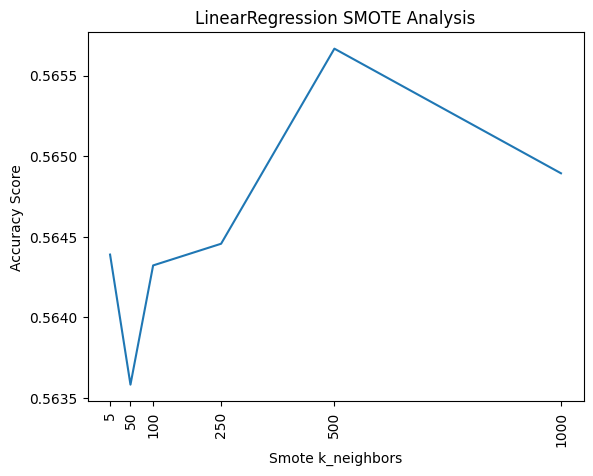

In [14]:
lr_smote_compressed_results = lr_smote_compressed_results.reset_index(drop=True)

lr_smote_best_acc = lr_smote_compressed_results[(lr_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lr_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lr_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
lr_smote_best_acc = lr_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(lr_smote_best_acc['smote_k_neighbors'], lr_smote_best_acc['mean_test_accuracy'])
plt.xticks(lr_smote_best_acc['smote_k_neighbors'], rotation=90)
plt.xlabel('Smote k_neighbors')
plt.title('LinearRegression SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/lr_smote_k_neighbors.png');

#### LinearRegression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [15]:
lr_param_grid = {
    'regressor_type': ['lr'] # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.1],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

lr_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lr_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer:

In [16]:
lr_cc_compressed_results = lr_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lr_cc_compressed_results.head()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lr_cc_compressed_results.head(1).copy()

lr_cc_compressed_results = lr_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lr_cc_compressed_results.head(1).copy()

lr_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lr_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,stemmatized,CountVectorized,cc,5,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
0,stemmatized,CountVectorized,cc,5,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
0,stemmatized,CountVectorized,cc,5,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
0,stemmatized,CountVectorized,cc,5,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
0,stemmatized,TFIDFVectorized,cc,5,0.284016,0.284016,0.284016,0.284016,-8.005287,-4.019386
0,stemmatized,TFIDFVectorized,cc,5,0.284016,0.284016,0.284016,0.284016,-8.005287,-4.019386


,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
6,stemmatized,CountVectorized,cc,5,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
5,stemmatized,CountVectorized,cc,25,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
7,stemmatized,CountVectorized,cc,50,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
8,stemmatized,CountVectorized,cc,250,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933
9,stemmatized,CountVectorized,cc,1000,0.299437,0.299437,0.299437,0.299437,-9.023506,-4.599933


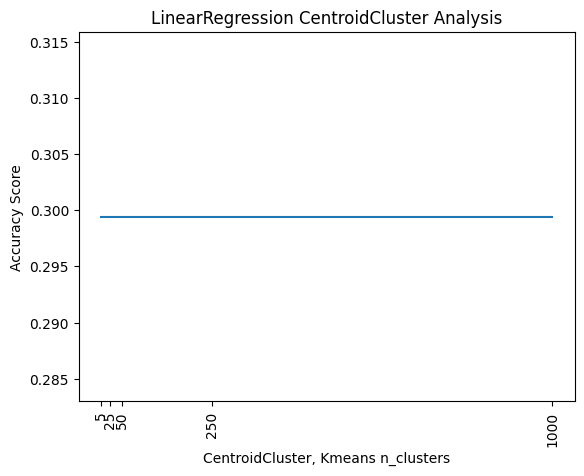

In [17]:
lr_cc_compressed_results = lr_cc_compressed_results.reset_index(drop=True)

lr_cc_best_acc = lr_cc_compressed_results[(lr_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lr_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lr_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
lr_cc_best_acc = lr_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(lr_cc_best_acc['cc_clusters'], lr_cc_best_acc['mean_test_accuracy'])
plt.xticks(lr_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidCluster, Kmeans n_clusters')
plt.title('LinearRegression CentroidCluster Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/lr_cc_n_clusters.png');

lr_cc_best_acc.head()

In [137]:
# Best results occured with smote

cutter = CutTransformer()
lr_best_model = LinearRegression()

lr_best_X_train_tokens = column_stemmatizer(X_train)
lr_best_X_test_tokens= column_stemmatizer(X_test)

lr_best_X_train_vectors, lr_best_X_test_vectors = tfidf_vectorize_data(lr_best_X_train_tokens, lr_best_X_test_tokens)
lr_best_X_train_sampled, y_train_sampled = Sampler(X=lr_best_X_train_vectors, y=y_train, state='smote', k_neighbors=1000)
lr_best_model.fit(lr_best_X_train_vectors, y_train)

lr_train_best_y_pred = lr_best_model.predict(lr_best_X_train_vectors)
lr_test_best_y_pred = lr_best_model.predict(lr_best_X_test_vectors)

lr_train_best_y_pred_cut = cutter.transform(lr_train_best_y_pred)
lr_test_best_y_pred_cut = cutter.transform(lr_test_best_y_pred)

In [138]:
accuracy_train_lr_best = accuracy_score(y_train, lr_train_best_y_pred_cut)
precision_train_lr_best = precision_score(y_train, lr_train_best_y_pred_cut, average='weighted')
recall_train_lr_best = recall_score(y_train, lr_train_best_y_pred_cut, average='weighted')
f1_train_lr_best = f1_score(y_train, lr_train_best_y_pred_cut, average='weighted')
r2_train_lr_best = r2_score(y_train, lr_train_best_y_pred_cut)
mse_train_lr_best = mean_squared_error(y_train, lr_train_best_y_pred_cut)

accuracy_test_lr_best = accuracy_score(y_test, lr_test_best_y_pred_cut)
precision_test_lr_best = precision_score(y_test, lr_test_best_y_pred_cut, average='weighted')
recall_test_lr_best = recall_score(y_test, lr_test_best_y_pred_cut, average='weighted')
f1_test_lr_best = f1_score(y_test, lr_test_best_y_pred_cut, average='weighted')
r2_test_lr_best = r2_score(y_test, lr_test_best_y_pred_cut)
mse_test_lr_best = mean_squared_error(y_test, lr_test_best_y_pred_cut)

print('Train Results')
print("Accuracy Score: Linear Regression Train Data (lem - CV):", accuracy_train_lr_best)
print("Precision Score: Linear Regression Train Data (lem - CV):", precision_train_lr_best)
print("Recall Score: Linear Regression Train Data (lem - CV):", recall_train_lr_best)
print("F1 Score: Linear Regression Train Data (lem - CV):", f1_train_lr_best)
print("R Squared Score: Linear Regression Train Data (lem - CV):", r2_train_lr_best)
print("Mean Squared Error Score: Linear Regression Train Data (lem - CV):", mse_train_lr_best)
print()
print('Test Results')
print("Accuracy Score: Linear Regression Test Data (lem - CV):", accuracy_test_lr_best)
print("Precision Score: Linear Regression Test Data (lem - CV):", precision_test_lr_best)
print("Recall Score: Linear Regression Test Data (lem - CV):", recall_test_lr_best)
print("F1 Score: Linear Regression Test Data (lem - CV):", f1_test_lr_best)
print("R Squared Score: Linear Regression Test Data (lem - CV):", r2_test_lr_best)
print("Mean Squared Error Score: Linear Regression Test Data (lem - CV):", mse_test_lr_best)

Train Results
Accuracy Score: Linear Regression Train Data (lem - CV): 0.6972724315784582
Precision Score: Linear Regression Train Data (lem - CV): 0.8024039247831268
Recall Score: Linear Regression Train Data (lem - CV): 0.6972724315784582
F1 Score: Linear Regression Train Data (lem - CV): 0.7244466590537356
R Squared Score: Linear Regression Train Data (lem - CV): 0.8381978043046847
Mean Squared Error Score: Linear Regression Train Data (lem - CV): 0.4648018214766972

Test Results
Accuracy Score: Linear Regression Test Data (lem - CV): 0.38044126416219437
Precision Score: Linear Regression Test Data (lem - CV): 0.5117161435775403
Recall Score: Linear Regression Test Data (lem - CV): 0.38044126416219437
F1 Score: Linear Regression Test Data (lem - CV): 0.42270072222140537
R Squared Score: Linear Regression Test Data (lem - CV): 0.16155317892897125
Mean Squared Error Score: Linear Regression Test Data (lem - CV): 2.3841275004065703


[[3698 1468  477   36    2]
 [ 112  987  342   50    1]
 [  14  202 1234  238   11]
 [   1   55  415 2081  375]
 [   0   20  391 2305 7006]]
[[1744 1299  943  441  347]
 [ 301  311  319  198  147]
 [ 233  262  423  298  261]
 [ 202  256  525  708  889]
 [ 494  496 1325 2193 3832]]


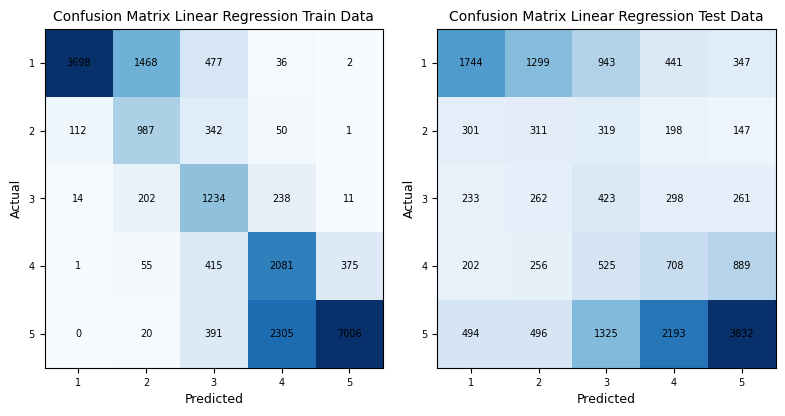

In [139]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, lr_train_best_y_pred_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Linear Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test, lr_test_best_y_pred_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Linear Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/lrBestConfMatrix.png')
plt.show()

#### Lasso L1 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [18]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

lasso_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds 

In [19]:
lasso_basic_compressed_results = lasso_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_lasso_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_basic_compressed_results.head()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_basic_compressed_results.head(1).copy()

lasso_basic_compressed_results = lasso_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_basic_compressed_results.head(1).copy()

lasso_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(lasso_basic_best_df)

,tokenizer,vectorizer,resampler,param_lasso_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,None,0.001,0.284374,0.284374,0.284374,0.284374,0.442086,-1.602294
0,lemmatized,CountVectorized,None,0.001,0.284374,0.284374,0.284374,0.284374,0.442086,-1.602294
0,lemmatized,CountVectorized,None,0.001,0.284374,0.284374,0.284374,0.284374,0.442086,-1.602294
0,lemmatized,CountVectorized,None,0.001,0.284374,0.284374,0.284374,0.284374,0.442086,-1.602294
0,lemmatized,CountVectorized,None,0.001,0.284374,0.284374,0.284374,0.284374,0.442086,-1.602294
0,lemmatized,CountVectorized,rOs,0.001,0.270614,0.270614,0.270614,0.270614,0.317911,-1.504915


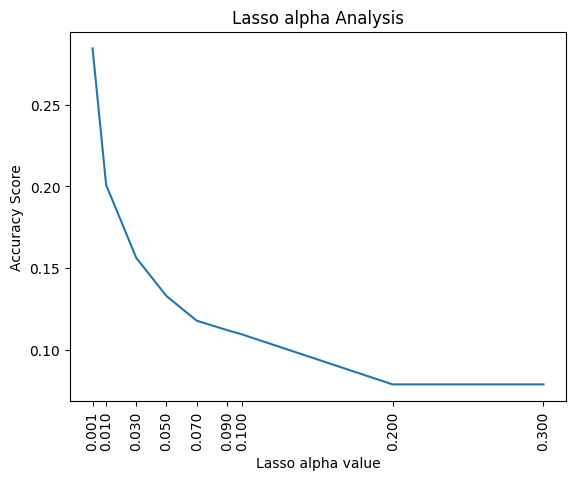

In [20]:
if best_acc['resampler'].values[0]:
    lasso_basic_best_alpha = lasso_basic_compressed_results[(lasso_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (lasso_basic_compressed_results['resampler'] == best_acc['resampler'].values[0])].copy()
else:
    lasso_basic_best_alpha = lasso_basic_compressed_results[(lasso_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (lasso_basic_compressed_results['resampler'].isna())].copy()
lasso_basic_best_alpha = lasso_basic_best_alpha.sort_values(by='param_lasso_alpha', ascending=True)

plt.plot(lasso_basic_best_alpha['param_lasso_alpha'], lasso_basic_best_alpha['mean_test_accuracy'])
plt.xticks(list(lasso_basic_best_alpha['param_lasso_alpha'].values), rotation=90)
plt.xlabel('Lasso alpha value')
plt.title('Lasso alpha Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/lasso_alphas.png');

#### Lasso L1 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [21]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001]
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

lasso_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Fitting 5 fo

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.


In [22]:
lasso_smote_compressed_results = lasso_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'param_lasso_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_smote_compressed_results.head()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_smote_compressed_results.head(1).copy()

lasso_smote_compressed_results = lasso_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_smote_compressed_results.head(1).copy()

lasso_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lasso_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,param_lasso_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.223758,0.223758,0.223758,0.223758,0.284242,-1.607129
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.223758,0.223758,0.223758,0.223758,0.284242,-1.607129
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.223758,0.223758,0.223758,0.223758,0.284242,-1.607129
0,stemmatized,TFIDFVectorized,smote,500,0.001,0.223758,0.223758,0.223758,0.223758,0.284242,-1.607129
0,lemmatized,CountVectorized,smote,1000,0.001,0.211219,0.211219,0.211219,0.211219,0.305177,-1.543804
0,lemmatized,CountVectorized,smote,1000,0.001,0.211219,0.211219,0.211219,0.211219,0.305177,-1.543804


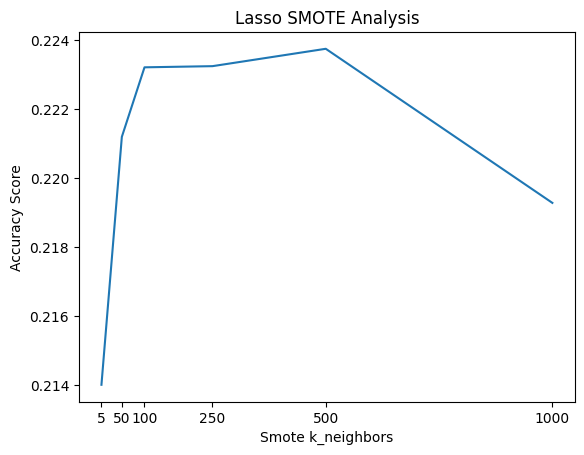

In [23]:
lasso_smote_compressed_results = lasso_smote_compressed_results.reset_index(drop=True)

lasso_smote_best_acc = lasso_smote_compressed_results[(lasso_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lasso_smote_compressed_results['resampler']== best_acc['resampler'].values[0]) & (lasso_smote_compressed_results['param_lasso_alpha']== best_acc['param_lasso_alpha'].values[0])]
lasso_smote_best_acc = lasso_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(lasso_smote_best_acc['smote_k_neighbors'], lasso_smote_best_acc['mean_test_accuracy'])
plt.xticks(lasso_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('Lasso SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/lasso_smote_k_neighbors.png');

#### Lasso L1 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [24]:
lasso_param_grid = {
    'regressor_type': ['lasso'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    'lasso_alpha': [0.001]
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

lasso_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=lasso_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer:

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 25 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 1000 - completed.


In [25]:
lasso_cc_compressed_results = lasso_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

lasso_cc_compressed_results.head()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = lasso_cc_compressed_results.head(1).copy()

lasso_cc_compressed_results = lasso_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = lasso_cc_compressed_results.head(1).copy()

lasso_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

lasso_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302


,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
4,lemmatized,CountVectorized,cc,25,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
1,lemmatized,CountVectorized,cc,50,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
2,lemmatized,CountVectorized,cc,250,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302
3,lemmatized,CountVectorized,cc,1000,0.213532,0.213532,0.213532,0.213532,-4.577855,-1.970302


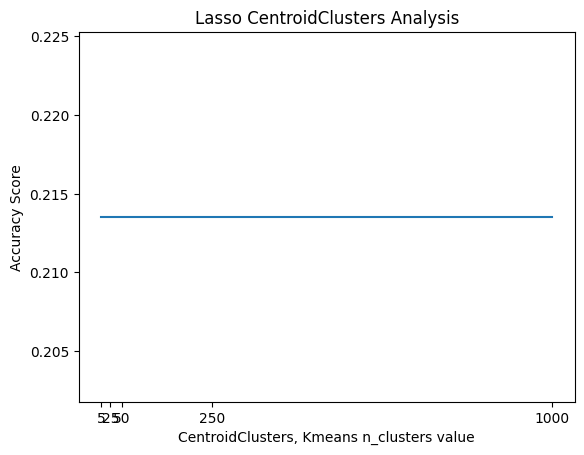

In [26]:
lasso_cc_compressed_results = lasso_cc_compressed_results.reset_index(drop=True)

lasso_cc_best_acc = lasso_cc_compressed_results[(lasso_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (lasso_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (lasso_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
lasso_cc_best_acc = lasso_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(lasso_cc_best_acc['cc_clusters'], lasso_cc_best_acc['mean_test_accuracy'])
plt.xticks(lasso_cc_best_acc['cc_clusters'])
plt.xlabel('CentroidClusters, Kmeans n_clusters value')
plt.title('Lasso CentroidClusters Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/lasso_cc_n_clusters.png');

lasso_cc_best_acc.head()

In [109]:
# Best results occured with no sampling

cutter = CutTransformer()
lasso_best_model = Lasso(alpha=0.001)

lasso_best_X_train_tokens = column_lemmatizer(X_train)
lasso_best_X_test_tokens= column_lemmatizer(X_test)

lasso_best_X_train_vectors, lasso_best_X_test_vectors = count_vectorize_data(lasso_best_X_train_tokens, lasso_best_X_test_tokens)

lasso_best_model.fit(lasso_best_X_train_vectors, y_train)

lasso_train_best_y_pred = lasso_best_model.predict(lasso_best_X_train_vectors)
lasso_test_best_y_pred = lasso_best_model.predict(lasso_best_X_test_vectors)

lasso_train_best_y_pred_cut = cutter.transform(lasso_train_best_y_pred)
lasso_test_best_y_pred_cut = cutter.transform(lasso_test_best_y_pred)

In [110]:
accuracy_train_lasso_best = accuracy_score(y_train, lasso_train_best_y_pred_cut)
precision_train_lasso_best = precision_score(y_train, lasso_train_best_y_pred_cut, average='weighted')
recall_train_lasso_best = recall_score(y_train, lasso_train_best_y_pred_cut, average='weighted')
f1_train_lasso_best = f1_score(y_train, lasso_train_best_y_pred_cut, average='weighted')
r2_train_lasso_best = r2_score(y_train, lasso_train_best_y_pred_cut)
mse_train_lasso_best = mean_squared_error(y_train, lasso_train_best_y_pred_cut)

accuracy_test_lasso_best = accuracy_score(y_test, lasso_test_best_y_pred_cut)
precision_test_lasso_best = precision_score(y_test, lasso_test_best_y_pred_cut, average='weighted')
recall_test_lasso_best = recall_score(y_test, lasso_test_best_y_pred_cut, average='weighted')
f1_test_lasso_best = f1_score(y_test, lasso_test_best_y_pred_cut, average='weighted')
r2_test_lasso_best = r2_score(y_test, lasso_test_best_y_pred_cut)
mse_test_lasso_best = mean_squared_error(y_test, lasso_test_best_y_pred_cut)

print('Train Results')
print("Accuracy Score: Lasso Regression Train Data (lem - CV):", accuracy_train_lasso_best)
print("Precision Score: Lasso Regression Train Data (lem - CV):", precision_train_lasso_best)
print("Recall Score: Lasso Regression Train Data (lem - CV):", recall_train_lasso_best)
print("F1 Score: Lasso Regression Train Data (lem - CV):", f1_train_lasso_best)
print("R Squared Score: Lasso Regression Train Data (lem - CV):", r2_train_lasso_best)
print("Mean Squared Error Score: Lasso Regression Train Data (lem - CV):", mse_train_lasso_best)
print()
print('Test Results')
print("Accuracy Score: Lasso Regression Test Data (lem - CV):", accuracy_test_lasso_best)
print("Precision Score: Lasso Regression Test Data (lem - CV):", precision_test_lasso_best)
print("Recall Score: Lasso Regression Test Data (lem - CV):", recall_test_lasso_best)
print("F1 Score: Lasso Regression Test Data (lem - CV):", f1_test_lasso_best)
print("R Squared Score: Lasso Regression Test Data (lem - CV):", r2_test_lasso_best)
print("Mean Squared Error Score: Lasso Regression Test Data (lem - CV):", mse_test_lasso_best)

Train Results
Accuracy Score: Lasso Regression Train Data (lem - CV): 0.2938060499047442
Precision Score: Lasso Regression Train Data (lem - CV): 0.6590226213650211
Recall Score: Lasso Regression Train Data (lem - CV): 0.2938060499047442
F1 Score: Lasso Regression Train Data (lem - CV): 0.32215076009131577
R Squared Score: Lasso Regression Train Data (lem - CV): 0.4883731430727961
Mean Squared Error Score: Lasso Regression Train Data (lem - CV): 1.4697272431578459

Test Results
Accuracy Score: Lasso Regression Test Data (lem - CV): 0.27950344229414
Precision Score: Lasso Regression Test Data (lem - CV): 0.6279626540265073
Recall Score: Lasso Regression Test Data (lem - CV): 0.27950344229414
F1 Score: Lasso Regression Test Data (lem - CV): 0.3026882859084372
R Squared Score: Lasso Regression Test Data (lem - CV): 0.44439076504561026
Mean Squared Error Score: Lasso Regression Test Data (lem - CV): 1.5798774868542311


[[ 929 1901 2594  252    5]
 [  98  351  846  193    4]
 [  43  181  972  458   45]
 [  13   87  953 1508  366]
 [   9   69 1544 5537 2563]]
[[ 689 1539 2281  252   13]
 [  77  281  717  187   14]
 [  36  172  821  393   55]
 [  22   97  772 1300  389]
 [  12   71 1546 4646 2065]]


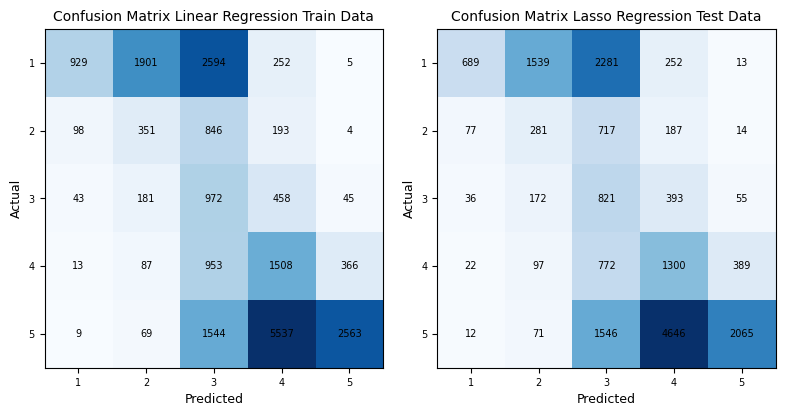

In [111]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, lasso_train_best_y_pred_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Linear Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test, lasso_test_best_y_pred_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Lasso Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/lassoBestConfMatrix.png')
plt.show()

#### Ridge L2 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [27]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

ridge_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds 

In [28]:
ridge_basic_compressed_results = ridge_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_ridge_alpha', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_basic_compressed_results.head()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_basic_compressed_results.head(1).copy()

ridge_basic_compressed_results = ridge_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_basic_compressed_results.head(1).copy()

ridge_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(ridge_basic_best_df)

,tokenizer,vectorizer,resampler,param_ridge_alpha,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,rOs,0.001,0.556792,0.556792,0.556792,0.556792,-0.247849,-2.914586
0,lemmatized,CountVectorized,rOs,0.001,0.556792,0.556792,0.556792,0.556792,-0.247849,-2.914586
0,lemmatized,CountVectorized,rOs,0.001,0.556792,0.556792,0.556792,0.556792,-0.247849,-2.914586
0,lemmatized,CountVectorized,rOs,0.001,0.556792,0.556792,0.556792,0.556792,-0.247849,-2.914586
6,lemmatized,TFIDFVectorized,None,0.3,0.378608,0.378608,0.378608,0.378608,0.511781,-1.401930
6,lemmatized,TFIDFVectorized,rOs,0.3,0.478340,0.478340,0.478340,0.478340,0.426664,-1.111044


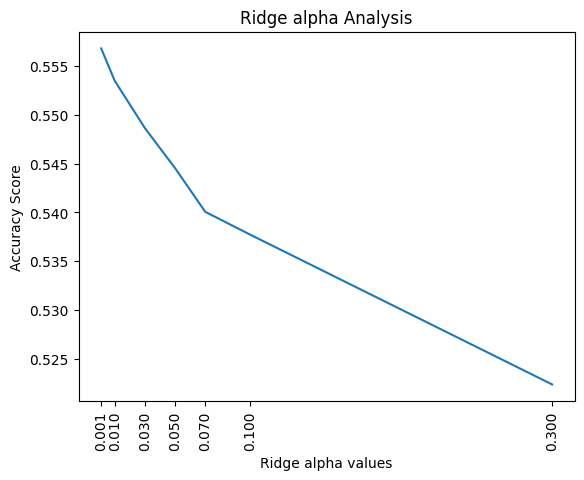

In [29]:
if best_acc['resampler'].values[0]:
    ridge_basic_best_alpha = ridge_basic_compressed_results[(ridge_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (ridge_basic_compressed_results['resampler'] == best_acc['resampler'].values[0])].copy()
else:
    ridge_basic_best_alpha = ridge_basic_compressed_results[(ridge_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (ridge_basic_compressed_results['resampler'].isna())].copy()
ridge_basic_best_alpha = ridge_basic_best_alpha.sort_values(by='param_ridge_alpha', ascending=True)

plt.plot(ridge_basic_best_alpha['param_ridge_alpha'], ridge_basic_best_alpha['mean_test_accuracy'])
plt.xticks(list(ridge_basic_best_alpha['param_ridge_alpha'].values), rotation=90)
plt.xlabel('Ridge alpha values')
plt.title('Ridge alpha Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/ridge_alphas.png');

#### Ridge L2 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [30]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
}

ridge_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Fitting 5 fo

In [31]:
ridge_smote_compressed_results = ridge_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_smote_compressed_results.head()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_smote_compressed_results.head(1).copy()

ridge_smote_compressed_results = ridge_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_smote_compressed_results.head(1).copy()

ridge_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

ridge_smote_best_df

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431
0,lemmatized,TFIDFVectorized,smote,1000,0.490037,0.490037,0.490037,0.490037,0.430238,-1.081431


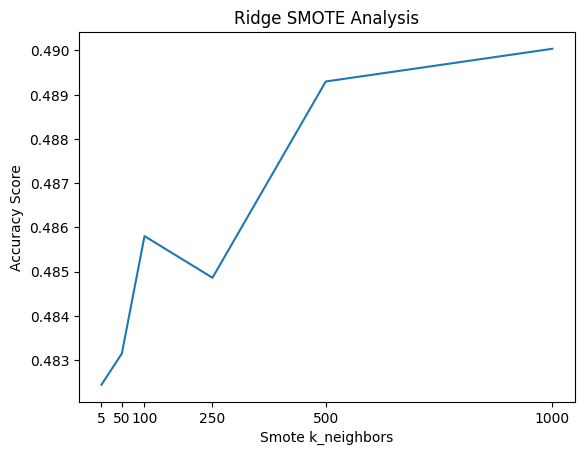

In [32]:
ridge_smote_compressed_results = ridge_smote_compressed_results.reset_index(drop=True)

ridge_smote_best_acc = ridge_smote_compressed_results[(ridge_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (ridge_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
ridge_smote_best_acc = ridge_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(ridge_smote_best_acc['smote_k_neighbors'], ridge_smote_best_acc['mean_test_accuracy'])
plt.xticks(ridge_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('Ridge SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/ridge_smote_k_neighbors.png');

#### Ridge L2 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [33]:
ridge_param_grid = {
    'regressor_type': ['ridge'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    'ridge_alpha': [0.3]
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

ridge_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=ridge_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer:

In [34]:
ridge_cc_compressed_results = ridge_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

ridge_cc_compressed_results.head()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = ridge_cc_compressed_results.head(1).copy()

ridge_cc_compressed_results = ridge_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = ridge_cc_compressed_results.head(1).copy()

ridge_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

ridge_cc_best_df

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,5,0.312009,0.312009,0.312009,0.312009,-5.459913,-2.353499
0,lemmatized,CountVectorized,cc,5,0.312009,0.312009,0.312009,0.312009,-5.459913,-2.353499
0,lemmatized,CountVectorized,cc,5,0.312009,0.312009,0.312009,0.312009,-5.459913,-2.353499
0,lemmatized,CountVectorized,cc,5,0.312009,0.312009,0.312009,0.312009,-5.459913,-2.353499
0,stemmatized,TFIDFVectorized,cc,5,0.294558,0.294558,0.294558,0.294558,-4.072997,-1.840659
0,stemmatized,TFIDFVectorized,cc,5,0.294558,0.294558,0.294558,0.294558,-4.072997,-1.840659


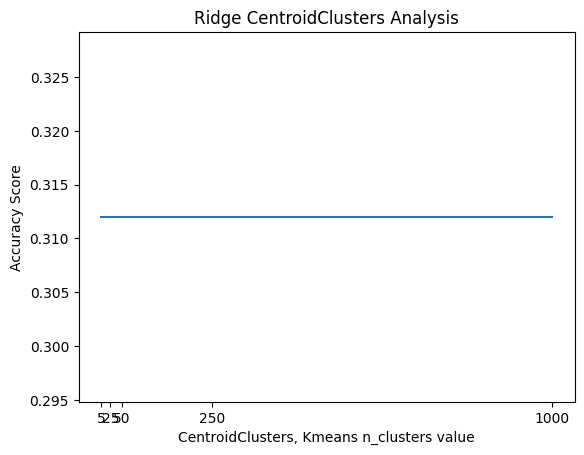

In [35]:
ridge_cc_compressed_results = ridge_cc_compressed_results.reset_index(drop=True)

ridge_cc_best_acc = ridge_cc_compressed_results[(ridge_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (ridge_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (ridge_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
ridge_cc_best_acc = ridge_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(ridge_cc_best_acc['cc_clusters'], ridge_cc_best_acc['mean_test_accuracy'])
plt.xticks(ridge_cc_best_acc['cc_clusters'])
plt.xlabel('CentroidClusters, Kmeans n_clusters value')
plt.title('Ridge CentroidClusters Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/ridge_cc_n_clusters.png');

In [118]:

cutter = CutTransformer()
ridge_best_model = Ridge(alpha=0.3)

ridge_best_X_train_tokens = column_lemmatizer(X_train)
ridge_best_X_test_tokens= column_lemmatizer(X_test)

ridge_best_X_train_vectors, ridge_best_X_test_vectors = tfidf_vectorize_data(ridge_best_X_train_tokens, ridge_best_X_test_tokens)
ridge_best_X_train_sampled, y_train_sampled = Sampler(X=ridge_best_X_train_vectors, y=y_train, state='smote', k_neighbors=1000)

ridge_best_model.fit(ridge_best_X_train_sampled, y_train_sampled)

ridge_train_best_y_pred = ridge_best_model.predict(ridge_best_X_train_vectors)
ridge_test_best_y_pred = ridge_best_model.predict(ridge_best_X_test_vectors)

ridge_train_best_y_pred_cut = cutter.transform(ridge_train_best_y_pred)
ridge_test_best_y_pred_cut = cutter.transform(ridge_test_best_y_pred)

In [119]:
accuracy_train_ridge_best = accuracy_score(y_train, ridge_train_best_y_pred_cut)
precision_train_ridge_best = precision_score(y_train, ridge_train_best_y_pred_cut, average='weighted')
recall_train_ridge_best = recall_score(y_train, ridge_train_best_y_pred_cut, average='weighted')
f1_train_ridge_best = f1_score(y_train, ridge_train_best_y_pred_cut, average='weighted')
r2_train_ridge_best = r2_score(y_train, ridge_train_best_y_pred_cut)
mse_train_ridge_best = mean_squared_error(y_train, ridge_train_best_y_pred_cut)

accuracy_test_ridge_best = accuracy_score(y_test, ridge_test_best_y_pred_cut)
precision_test_ridge_best = precision_score(y_test, ridge_test_best_y_pred_cut, average='weighted')
recall_test_ridge_best = recall_score(y_test, ridge_test_best_y_pred_cut, average='weighted')
f1_test_ridge_best = f1_score(y_test, ridge_test_best_y_pred_cut, average='weighted')
r2_test_ridge_best = r2_score(y_test, ridge_test_best_y_pred_cut)
mse_test_ridge_best = mean_squared_error(y_test, ridge_test_best_y_pred_cut)

print('Train Results')
print("Accuracy Score: Ridge Regression Train Data (lem - TFIDF):", accuracy_train_ridge_best)
print("Precision Score: Ridge Regression Train Data (lem - TFIDF):", precision_train_ridge_best)
print("Recall Score: Ridge Regression Train Data (lem - TFIDF):", recall_train_ridge_best)
print("F1 Score: Ridge Regression Train Data (lem - TFIDF):", f1_train_ridge_best)
print("R Squared Score: Ridge Regression Train Data (lem - TFIDF):", r2_train_lr_best)
print("Mean Squared Error Score: Ridge Regression Train Data (lem - TFIDF):", mse_train_ridge_best)
print()
print('Test Results')
print("Accuracy Score: Ridge Regression Test Data (lem - TFIDF):", accuracy_test_ridge_best)
print("Precision Score: Ridge Regression Test Data (lem - TFIDF):", precision_test_ridge_best)
print("Recall Score: Ridge Regression Test Data (lem - TFIDF):", recall_test_ridge_best)
print("F1 Score: Ridge Regression Test Data (lem - TFIDF):", f1_test_ridge_best)
print("R Squared Score: Ridge Regression Test Data (lem - TFIDF):", r2_test_ridge_best)
print("Mean Squared Error Score: Ridge Regression Test Data (lem - TFIDF):", mse_test_ridge_best)

Train Results
Accuracy Score: Ridge Regression Train Data (lem - TFIDF): 0.5227452255936063
Precision Score: Ridge Regression Train Data (lem - TFIDF): 0.7496605566775244
Recall Score: Ridge Regression Train Data (lem - TFIDF): 0.5227452255936063
F1 Score: Ridge Regression Train Data (lem - TFIDF): 0.5618859392709424
R Squared Score: Ridge Regression Train Data (lem - TFIDF): 0.8924823358205778
Mean Squared Error Score: Ridge Regression Train Data (lem - TFIDF): 0.7006180010222574

Test Results
Accuracy Score: Ridge Regression Test Data (lem - TFIDF): 0.38179649807556787
Precision Score: Ridge Regression Test Data (lem - TFIDF): 0.6434074025498028
Recall Score: Ridge Regression Test Data (lem - TFIDF): 0.38179649807556787
F1 Score: Ridge Regression Test Data (lem - TFIDF): 0.43508225057945443
R Squared Score: Ridge Regression Test Data (lem - TFIDF): 0.5102006428613718
Mean Squared Error Score: Ridge Regression Test Data (lem - TFIDF): 1.3927467880956252


[[2361 2652  615   50    3]
 [  55 1212  220    4    1]
 [  18  301 1044  321   15]
 [   2   69  723 1670  463]
 [   1   30  640 4088 4963]]
[[1484 1853 1137  276   24]
 [ 166  444  462  189   15]
 [  81  320  615  379   82]
 [  26  158  727 1112  557]
 [  25  236 1396 3295 3388]]


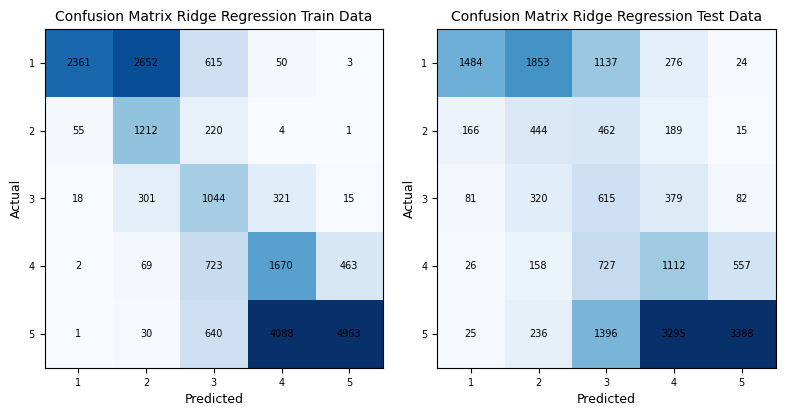

In [121]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, ridge_train_best_y_pred_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Ridge Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test, ridge_test_best_y_pred_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Ridge Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/RidgeBestConfMatrix.png')
plt.show()

#### ElasticNet combined L1/L2 Regression - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [36]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001, 0.01, 0.03, 0.05, 0.07, 0.1, 0.3],
    'elasticnet_l1_ratio': [0.3, 0.5, 0.7]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'] # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

enet_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: None - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rOs - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: rUs - completed.
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: None - completed.
Fi

In [37]:
enet_basic_compressed_results = enet_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_elasticnet_alpha', 'param_elasticnet_l1_ratio', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_basic_compressed_results.head()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_basic_compressed_results.head(1).copy()

enet_basic_compressed_results = enet_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_basic_compressed_results.head(1).copy()

enet_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_basic_best_df)

,tokenizer,vectorizer,resampler,param_elasticnet_alpha,param_elasticnet_l1_ratio,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.318209,0.318209,0.318209,0.318209,0.343481,-1.406228
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.318209,0.318209,0.318209,0.318209,0.343481,-1.406228
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.318209,0.318209,0.318209,0.318209,0.343481,-1.406228
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.318209,0.318209,0.318209,0.318209,0.343481,-1.406228
1,lemmatized,CountVectorized,None,0.001,0.5,0.296455,0.296455,0.296455,0.296455,0.451001,-1.576736
0,lemmatized,CountVectorized,rOs,0.001,0.3,0.318209,0.318209,0.318209,0.318209,0.343481,-1.406228


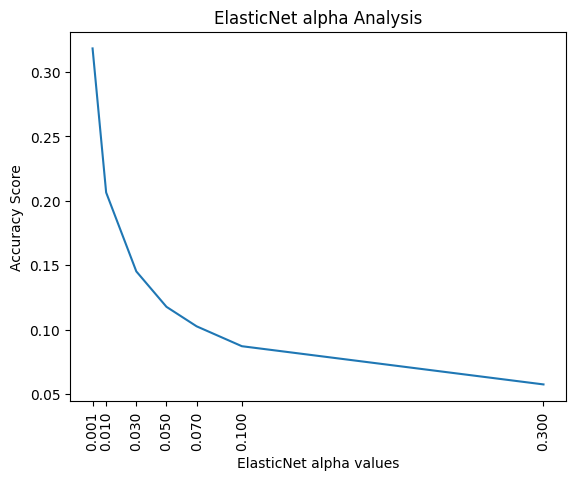

In [38]:
if best_acc['resampler'].values[0]:
    enet_basic_best_alpha = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (enet_basic_compressed_results['param_elasticnet_l1_ratio'] == best_acc['param_elasticnet_l1_ratio'].values[0])].copy()
else:
    enet_basic_best_alpha = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'].isna()) & (enet_basic_compressed_results['param_enet_l1_ratio'] == best_acc['param_enet_l1_ratio'].values[0])].copy()
enet_basic_best_alpha = enet_basic_best_alpha.sort_values(by='param_elasticnet_alpha', ascending=True)

plt.plot(enet_basic_best_alpha['param_elasticnet_alpha'], enet_basic_best_alpha['mean_test_accuracy'])
plt.xticks(list(enet_basic_best_alpha['param_elasticnet_alpha'].values), rotation=90)
plt.xlabel('ElasticNet alpha values')
plt.title('ElasticNet alpha Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/enet_alphas.png');

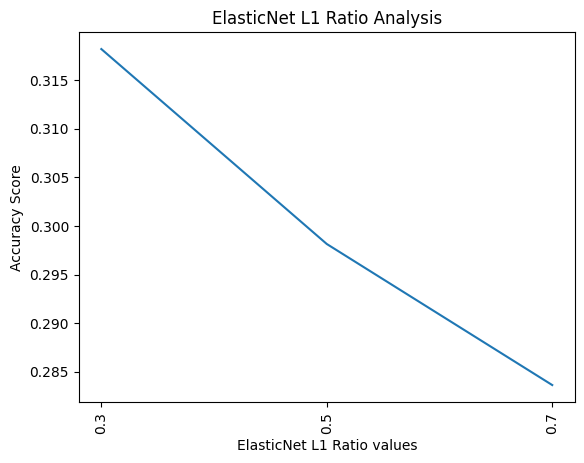

In [39]:
if best_acc['resampler'].values[0]:
    enet_basic_best_l1_ratio = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (enet_basic_compressed_results['param_elasticnet_alpha'] == best_acc['param_elasticnet_alpha'].values[0])].copy()
else:
    enet_basic_best_l1_ratio = enet_basic_compressed_results[(enet_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (enet_basic_compressed_results['resampler'].isna()) & (enet_basic_compressed_results['param_enet_alpha'] == best_acc['param_enet_alpha'].values[0])].copy()
enet_basic_best_l1_ratio = enet_basic_best_l1_ratio.sort_values(by='param_elasticnet_l1_ratio', ascending=True)

plt.plot(enet_basic_best_l1_ratio['param_elasticnet_l1_ratio'], enet_basic_best_l1_ratio['mean_test_accuracy'])
plt.xticks(list(enet_basic_best_l1_ratio['param_elasticnet_l1_ratio'].values), rotation=90)
plt.xlabel('ElasticNet L1 Ratio values')
plt.title('ElasticNet L1 Ratio Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/enet_l1_ratios.png');

#### ElasticNet L1/L2 Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [40]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001],
    'elasticnet_l1_ratio': [0.3]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

enet_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Fitting 5 fo

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.17825932987762, tolerance: 7.420532560250341
  model = cd_fast.sparse_enet_coordinate_descent(


Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 100 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 500 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: stemmatized, Vectorizer: TFIDFVectorized, Resampler: smote, smote_k_neighbors: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokeni

In [41]:
enet_smote_compressed_results = enet_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_smote_compressed_results.head()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_smote_compressed_results.head(1).copy()

enet_smote_compressed_results = enet_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_smote_compressed_results.head(1).copy()

enet_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_smote_best_df)

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814
0,lemmatized,CountVectorized,smote,1000,0.23747,0.23747,0.23747,0.23747,0.323496,-1.488814


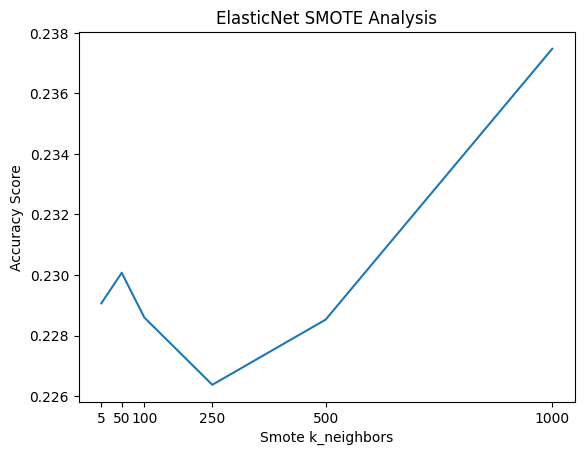

In [42]:
enet_smote_compressed_results = enet_smote_compressed_results.reset_index(drop=True)

enet_smote_best_acc = enet_smote_compressed_results[(enet_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_smote_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (enet_smote_compressed_results['resampler']== best_acc['resampler'].values[0])]
enet_smote_best_acc = enet_smote_best_acc.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(enet_smote_best_acc['smote_k_neighbors'], enet_smote_best_acc['mean_test_accuracy'])
plt.xticks(enet_smote_best_acc['smote_k_neighbors'])
plt.xlabel('Smote k_neighbors')
plt.title('ElasticNet SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/enet_smote_k_neighbors.png');

#### ElasticNet L1/L2 Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [43]:
enet_param_grid = {
    'regressor_type': ['elasticnet'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    'elasticnet_alpha': [0.001],
    'elasticnet_l1_ratio': [0.3]
    # 'gbr_learning_rate': [0.1], 
    # 'gbr_max_depth': [10]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

enet_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=enet_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 25 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 50 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 250 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 1000 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer: lemmatized, Vectorizer: TFIDFVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tokenizer:

In [44]:
enet_cc_compressed_results = enet_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'mean_test_accuracy', 'cc_clusters', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

enet_cc_compressed_results.head()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = enet_cc_compressed_results.head(1).copy()

enet_cc_compressed_results = enet_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = enet_cc_compressed_results.head(1).copy()

enet_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(enet_cc_best_df)

,tokenizer,vectorizer,resampler,mean_test_accuracy,cc_clusters,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797
0,lemmatized,CountVectorized,cc,0.234522,5,0.234522,0.234522,0.234522,-4.395746,-1.889797


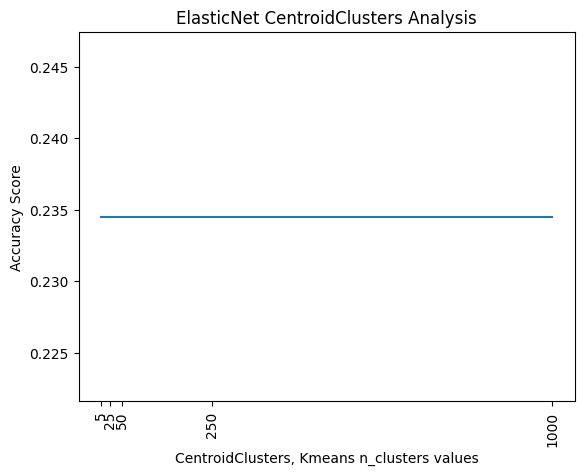

In [45]:
enet_cc_compressed_results = enet_cc_compressed_results.reset_index(drop=True)

enet_cc_best_acc = enet_cc_compressed_results[(enet_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (enet_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (enet_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
enet_cc_best_acc = enet_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(enet_cc_best_acc['cc_clusters'], enet_cc_best_acc['mean_test_accuracy'])
plt.xticks(enet_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidClusters, Kmeans n_clusters values')
plt.title('ElasticNet CentroidClusters Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/enet_cc_n_clusters.png');

In [122]:
# Best results occured with no sampling

cutter = CutTransformer()
enet_best_model = ElasticNet(alpha=0.001, l1_ratio=0.3)

enet_best_X_train_tokens = column_lemmatizer(X_train)
enet_best_X_test_tokens= column_lemmatizer(X_test)

enet_best_X_train_vectors, enet_best_X_test_vectors = count_vectorize_data(enet_best_X_train_tokens, enet_best_X_test_tokens)

enet_best_X_train_sampled, y_train_sampled = Sampler(X=enet_best_X_train_vectors, y=y_train, state='rOs')
enet_best_model.fit(enet_best_X_train_sampled, y_train_sampled)

enet_train_best_y_pred = enet_best_model.predict(enet_best_X_train_vectors)
enet_test_best_y_pred = enet_best_model.predict(enet_best_X_test_vectors)

enet_train_best_y_pred_cut = cutter.transform(enet_train_best_y_pred)
enet_test_best_y_pred_cut = cutter.transform(enet_test_best_y_pred)

In [123]:
accuracy_train_enet_best = accuracy_score(y_train, enet_train_best_y_pred_cut)
precision_train_enet_best = precision_score(y_train, enet_train_best_y_pred_cut, average='weighted')
recall_train_enet_best = recall_score(y_train, enet_train_best_y_pred_cut, average='weighted')
f1_train_enet_best = f1_score(y_train, enet_train_best_y_pred_cut, average='weighted')
r2_train_enet_best = r2_score(y_train, enet_train_best_y_pred_cut)
mse_train_enet_best = mean_squared_error(y_train, enet_train_best_y_pred_cut)

accuracy_test_enet_best = accuracy_score(y_test, enet_test_best_y_pred_cut)
precision_test_enet_best = precision_score(y_test, enet_test_best_y_pred_cut, average='weighted')
recall_test_enet_best = recall_score(y_test, enet_test_best_y_pred_cut, average='weighted')
f1_test_enet_best = f1_score(y_test, enet_test_best_y_pred_cut, average='weighted')
r2_test_enet_best = r2_score(y_test, enet_test_best_y_pred_cut)
mse_test_enet_best = mean_squared_error(y_test, enet_test_best_y_pred_cut)

print('Train Results')
print("Accuracy Score: Elastic Net Regression Train Data (lem - CV):", accuracy_train_enet_best)
print("Precision Score: Elastic Net Regression Train Data (lem - CV):", precision_train_enet_best)
print("Recall Score: Elastic Net Regression Train Data (lem - CV):", recall_train_enet_best)
print("F1 Score: Elastic Net Regression Train Data (lem - CV):", f1_train_enet_best)
print("R Squared Score: Elastic Net Regression Train Data (lem - CV):", r2_train_enet_best)
print("Mean Squared Error Score: Elastic Net Regression Train Data (lem - CV):", mse_train_enet_best)
print()
print('Test Results')
print("Accuracy Score: Elastic Net Regression Test Data (lem - CV):", accuracy_test_enet_best)
print("Precision Score: Elastic Net Regression Test Data (lem - CV):", precision_test_enet_best)
print("Recall Score: Elastic Net Regression Test Data (lem - CV):", recall_test_enet_best)
print("F1 Score: Elastic Net Regression Test Data (lem - CV):", f1_test_enet_best)
print("R Squared Score: Elastic Net Regression Test Data (lem - CV):", r2_test_enet_best)
print("Mean Squared Error Score: Elastic Net Regression Test Data (lem - CV):", mse_test_enet_best)

Train Results
Accuracy Score: Elastic Net Regression Train Data (lem - CV): 0.30268110217926675
Precision Score: Elastic Net Regression Train Data (lem - CV): 0.6795790731522134
Recall Score: Elastic Net Regression Train Data (lem - CV): 0.30268110217926675
F1 Score: Elastic Net Regression Train Data (lem - CV): 0.3312971788828537
R Squared Score: Elastic Net Regression Train Data (lem - CV): 0.5072659716814263
Mean Squared Error Score: Elastic Net Regression Train Data (lem - CV): 1.4154546721806607

Test Results
Accuracy Score: Elastic Net Regression Test Data (lem - CV): 0.26914945519596684
Precision Score: Elastic Net Regression Test Data (lem - CV): 0.6150042231527462
Recall Score: Elastic Net Regression Test Data (lem - CV): 0.26914945519596684
F1 Score: Elastic Net Regression Test Data (lem - CV): 0.29952183666012816
R Squared Score: Elastic Net Regression Test Data (lem - CV): 0.4227718770261799
Mean Squared Error Score: Elastic Net Regression Test Data (lem - CV): 1.6413508971

[[1128 2430 2027   95    1]
 [  65  768  637   22    0]
 [  48  294 1033  296   28]
 [  12  138 1229 1214  334]
 [   3   95 2330 4923 2371]]
[[ 861 1887 1887  130    9]
 [ 108  431  617  104   16]
 [  56  278  841  252   50]
 [  36  143 1075  949  377]
 [  23  152 2308 3974 1883]]


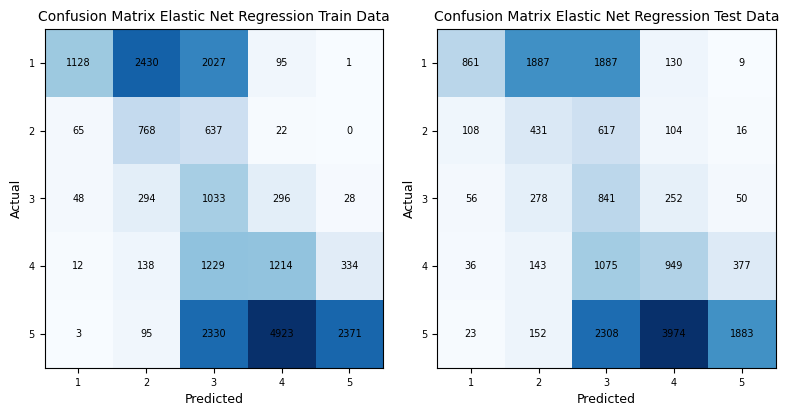

In [133]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))



# Calculate confusion matrix
cm = confusion_matrix(y_train, enet_train_best_y_pred_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Elastic Net Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test, enet_test_best_y_pred_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Elastic Net Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/EnetBestConfMatrix.png')
plt.show()

#### HistGradientBoostingRegressor - Basic Samplers
To reduce runtimes, the SMOTE and ClusterCentroids sampling methods have been seperated out to enable testing on several parameters within those methods.  
Basic Samplers include:  

* No sampling  
* RandomOverSampler sampling  
* RandomUnderSampler sampling  

In [46]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'hgbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.1, 0.5], 
    'gbr_max_depth': [50, 1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': [None, 'rOs', 'rUs'] # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

gbr_basic_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=3)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END gbr_learning_rate=0.1, gbr_max_depth=50, regressor_type=hgbr; total time= 3.9min
[CV] END gbr_learning_rate=0.1, gbr_max_depth=50, regressor_type=hgbr; total time= 3.8min
[CV] END gbr_learning_rate=0.1, gbr_max_depth=50, regressor_type=hgbr; total time= 3.9min
[CV] END gbr_learning_rate=0.1, gbr_max_depth=1000, regressor_type=hgbr; total time= 3.9min
[CV] END gbr_learning_rate=0.1, gbr_max_depth=1000, regressor_type=hgbr; total time= 3.9min
[CV] END gbr_learning_rate=0.1, gbr_max_depth=1000, regressor_type=hgbr; total time= 3.9min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=50, regressor_type=hgbr; total time= 1.2min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=50, regressor_type=hgbr; total time= 1.3min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=50, regressor_type=hgbr; total time= 2.0min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.6min
[CV] END gbr_learning_rate=0.5, 

In [47]:
gbr_basic_compressed_results = gbr_basic_results_df[['tokenizer', 'vectorizer', 'resampler', 'param_gbr_learning_rate', 'param_gbr_max_depth', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_basic_compressed_results.head()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_basic_compressed_results.head(1).copy()

gbr_basic_compressed_results = gbr_basic_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_basic_compressed_results.head(1).copy()

gbr_basic_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_basic_best_df)

,tokenizer,vectorizer,resampler,param_gbr_learning_rate,param_gbr_max_depth,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
3,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.413364,0.413364,0.413364,0.413364,0.242440,-1.296360
3,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.413364,0.413364,0.413364,0.413364,0.242440,-1.296360
3,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.413364,0.413364,0.413364,0.413364,0.242440,-1.296360
3,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.413364,0.413364,0.413364,0.413364,0.242440,-1.296360
0,stemmatized,TFIDFVectorized,None,0.1,50,0.388969,0.388969,0.388969,0.388969,0.510133,-1.407229
3,lemmatized,TFIDFVectorized,rOs,0.5,1000,0.413364,0.413364,0.413364,0.413364,0.242440,-1.296360


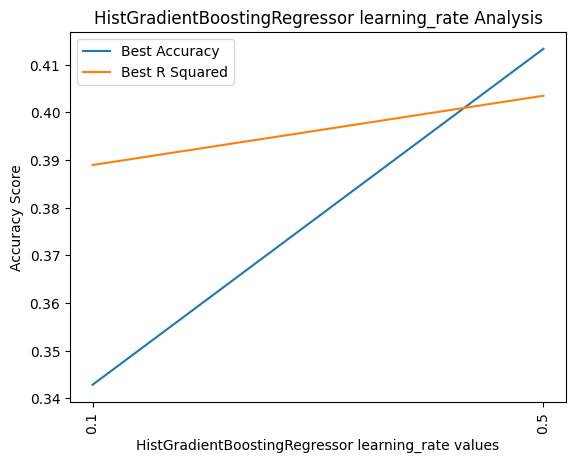

In [48]:
if best_acc['resampler'].values[0]:
    gbr_basic_best_learn_rate_acc = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_acc['param_gbr_max_depth'].values[0])].copy()
else:
    gbr_basic_best_learn_rate_acc = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_acc['param_gbr_max_depth'].values[0])].copy()
gbr_basic_best_learn_rate_acc = gbr_basic_best_learn_rate_acc.sort_values(by='param_gbr_learning_rate', ascending=True)

if best_r2['resampler'].values[0]:
    gbr_basic_best_learn_rate_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_r2['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_r2['param_gbr_max_depth'].values[0])].copy()
else:
    gbr_basic_best_learn_rate_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_max_depth'] == best_r2['param_gbr_max_depth'].values[0])].copy()
gbr_basic_best_learn_rate_r2 = gbr_basic_best_learn_rate_r2.sort_values(by='param_gbr_learning_rate', ascending=True)

plt.plot(gbr_basic_best_learn_rate_acc['param_gbr_learning_rate'], gbr_basic_best_learn_rate_acc['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_basic_best_learn_rate_r2['param_gbr_learning_rate'], gbr_basic_best_learn_rate_r2['mean_test_accuracy'], label='Best R Squared')
plt.xticks(list(gbr_basic_best_learn_rate_acc['param_gbr_learning_rate'].values), rotation=90)
plt.xlabel('HistGradientBoostingRegressor learning_rate values')
plt.title('HistGradientBoostingRegressor learning_rate Analysis')
plt.ylabel('Accuracy Score')
plt.legend()
plt.savefig('../images/hgbr_learn_rate.png');

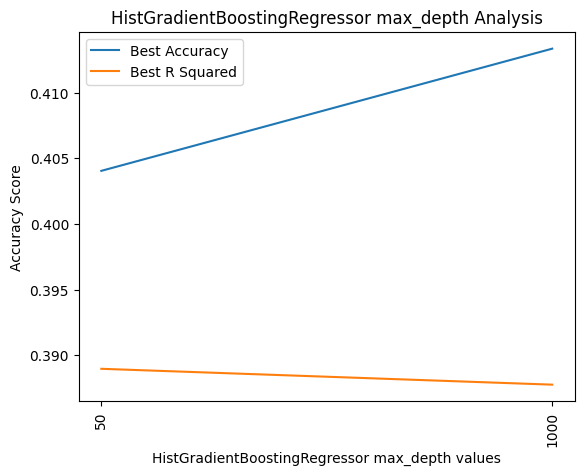

In [49]:
if best_acc['resampler'].values[0]:
    gbr_basic_best_max_depth = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_acc['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_acc['param_gbr_learning_rate'].values[0])].copy()
else:
    gbr_basic_best_max_depth = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_acc['param_gbr_learning_rate'].values[0])].copy()
gbr_basic_best_max_depth = gbr_basic_best_max_depth.sort_values(by='param_gbr_max_depth', ascending=True)

if best_r2['resampler'].values[0]:
    gbr_basic_best_max_depth_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'] == best_r2['resampler'].values[0]) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_r2['param_gbr_learning_rate'].values[0])].copy()
else:
    gbr_basic_best_max_depth_r2 = gbr_basic_compressed_results[(gbr_basic_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_basic_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_basic_compressed_results['resampler'].isna()) & (gbr_basic_compressed_results['param_gbr_learning_rate'] == best_r2['param_gbr_learning_rate'].values[0])].copy()
gbr_basic_best_max_depth_r2 = gbr_basic_best_max_depth_r2.sort_values(by='param_gbr_learning_rate', ascending=True)

plt.plot(gbr_basic_best_max_depth['param_gbr_max_depth'], gbr_basic_best_max_depth['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_basic_best_max_depth_r2['param_gbr_max_depth'], gbr_basic_best_max_depth_r2['mean_test_accuracy'], label='Best R Squared')
plt.xticks(list(gbr_basic_best_max_depth['param_gbr_max_depth'].values), rotation=90)
plt.xlabel('HistGradientBoostingRegressor max_depth values')
plt.title('HistGradientBoostingRegressor max_depth Analysis')
plt.ylabel('Accuracy Score')
plt.legend()
plt.savefig('../images/hgbr_max_depth.png');

#### HistGradientBoosting Regressor Regression - Smote analysis
Testing with k_neighbor values 5, 50, 100, 250, 500 and 1000

In [50]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'gbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.5], 
    'gbr_max_depth': [1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['smote'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    # 'clusters': [5, 25, 50, 250, 1000]
}

gbr_smote_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 2.4min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.6min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 2.1min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.7min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.6min
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: smote, smote_k_neighbors: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 2.0min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.8min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.7min
[CV] END gbr_learning_rate=0.5, gbr_max_de

In [51]:
gbr_smote_compressed_results = gbr_smote_results_df[['tokenizer', 'vectorizer', 'resampler', 'smote_k_neighbors', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_smote_compressed_results.head()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_smote_compressed_results.head(1).copy()

gbr_smote_compressed_results = gbr_smote_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_smote_compressed_results.head(1).copy()

gbr_smote_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_smote_best_df)

,tokenizer,vectorizer,resampler,smote_k_neighbors,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,lemmatized,CountVectorized,smote,100,0.492357,0.492357,0.492357,0.492357,0.392480,-1.181628
0,lemmatized,CountVectorized,smote,100,0.492357,0.492357,0.492357,0.492357,0.392480,-1.181628
0,lemmatized,CountVectorized,smote,100,0.492357,0.492357,0.492357,0.492357,0.392480,-1.181628
0,lemmatized,CountVectorized,smote,100,0.492357,0.492357,0.492357,0.492357,0.392480,-1.181628
0,lemmatized,TFIDFVectorized,smote,1000,0.437668,0.437668,0.437668,0.437668,0.414506,-1.186707
0,stemmatized,TFIDFVectorized,smote,5,0.449264,0.449264,0.449264,0.449264,0.412582,-1.173699


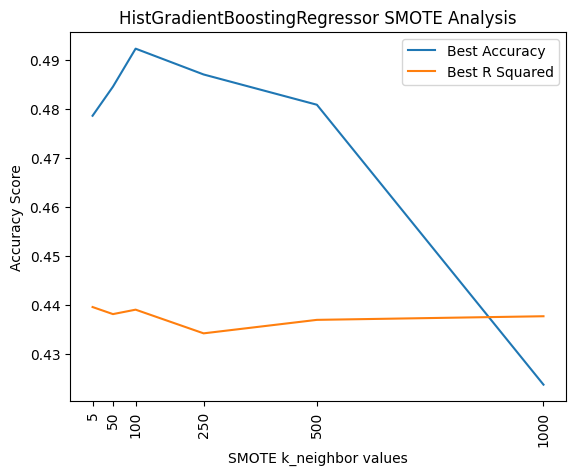

In [52]:
gbr_smote_compressed_results = gbr_smote_compressed_results.reset_index(drop=True)

gbr_smote_best_acc_50 = gbr_smote_compressed_results[(gbr_smote_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_smote_compressed_results['vectorizer'] == best_acc['vectorizer'].values[0]) & (gbr_smote_compressed_results['resampler'] == best_acc['resampler'].values[0])]
gbr_smote_best_acc_50 = gbr_smote_best_acc_50.sort_values(by='smote_k_neighbors', ascending=True)

gbr_smote_best_acc_250 = gbr_smote_compressed_results[(gbr_smote_compressed_results['tokenizer'] == best_r2['tokenizer'].values[0]) & (gbr_smote_compressed_results['vectorizer'] == best_r2['vectorizer'].values[0]) & (gbr_smote_compressed_results['resampler'] == best_r2['resampler'].values[0])]
gbr_smote_best_acc_250 = gbr_smote_best_acc_250.sort_values(by='smote_k_neighbors', ascending=True)

plt.plot(gbr_smote_best_acc_50['smote_k_neighbors'], gbr_smote_best_acc_50['mean_test_accuracy'], label='Best Accuracy')
plt.plot(gbr_smote_best_acc_250['smote_k_neighbors'], gbr_smote_best_acc_250['mean_test_accuracy'], label='Best R Squared')
plt.xticks(gbr_smote_best_acc_50['smote_k_neighbors'], rotation=90)
plt.xlabel('SMOTE k_neighbor values')
plt.title('HistGradientBoostingRegressor SMOTE Analysis')
plt.ylabel('Accuracy Score')
plt.legend()
plt.savefig('../images/hgbr_smote_k_neighbors.png');

#### HistGradientBoostingRegressor Regression - CentroidCluster Analysis  
CentroidCluster Testing using the KMeans estimator. The Kmeans estimator clusters data with "n_init" set to "auto", which should find the number of initialisations which converge if possible.  
"init" set to "k-means++" which will start the initialisation points as widely as possible with an even distribution.  
n_clusters are variable, clusters tested include 5, 25, 50, 250 and 1000.

In [53]:
gbr_param_grid = {
    'regressor_type': ['hgbr'], # 'lr', 'lasso', 'ridge', 'elasticnet', 'gbr' - gbr can take longer
    # 'lasso_alpha': [0.001, 0.01, 0.1, 0.3],
    # 'ridge_alpha': [0.001, 0.1],
    # 'elasticnet_alpha': [0.001, 0.1],
    # 'elasticnet_l1_ratio': [0.3, 0.5],
    'gbr_learning_rate': [0.5], 
    'gbr_max_depth': [1000]
} 

token_params=[True, False] # Boolean
vectorizer_params=[True, False] # Boolean
resampler_params= {
    'Resampler': ['cc'], # None, 'rOs', 'smote', 'rUs', 'cc' - cc can take longer
    # 'smote_k_neighbors': [5, 50, 100, 250, 500, 1000]
    'clusters': [5, 25, 50, 250, 1000]
}

gbr_cc_results_df = combined_custom_regression(tokenizer_params=token_params, vectorizer_params=vectorizer_params, resampler_params=resampler_params, custom_regressor_params=gbr_param_grid, cv=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.0min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.6min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.1min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.0min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.4min
Tokenizer: lemmatized, Vectorizer: CountVectorized, Resampler: cc, cc_clusters: 5 - completed.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.4min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.3min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000, regressor_type=hgbr; total time= 1.3min
[CV] END gbr_learning_rate=0.5, gbr_max_depth=1000,

In [54]:
gbr_cc_compressed_results = gbr_cc_results_df[['tokenizer', 'vectorizer', 'resampler', 'cc_clusters', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1_score', 'mean_test_r2_score', 'mean_test_mse']].copy()

gbr_cc_compressed_results.head()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_accuracy', ascending=False)

best_acc = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_precision', ascending=False)

best_pre = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_recall', ascending=False)

best_rec = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_f1_score', ascending=False)

best_f1 = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_r2_score', ascending=False)

best_r2 = gbr_cc_compressed_results.head(1).copy()

gbr_cc_compressed_results = gbr_cc_compressed_results.sort_values(by='mean_test_mse', ascending=False)

best_mse = gbr_cc_compressed_results.head(1).copy()

gbr_cc_best_df = pd.concat([best_acc, best_pre, best_rec, best_f1, best_r2, best_mse])

display(gbr_cc_best_df)

,tokenizer,vectorizer,resampler,cc_clusters,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1_score,mean_test_r2_score,mean_test_mse
0,stemmatized,TFIDFVectorized,cc,5,0.285681,0.285681,0.285681,0.285681,-4.496934,-1.977675
0,stemmatized,TFIDFVectorized,cc,5,0.285681,0.285681,0.285681,0.285681,-4.496934,-1.977675
0,stemmatized,TFIDFVectorized,cc,5,0.285681,0.285681,0.285681,0.285681,-4.496934,-1.977675
0,stemmatized,TFIDFVectorized,cc,5,0.285681,0.285681,0.285681,0.285681,-4.496934,-1.977675
0,lemmatized,CountVectorized,cc,25,0.270782,0.270782,0.270782,0.270782,-4.371397,-1.890854
0,lemmatized,CountVectorized,cc,250,0.268976,0.268976,0.268976,0.268976,-4.378697,-1.887844


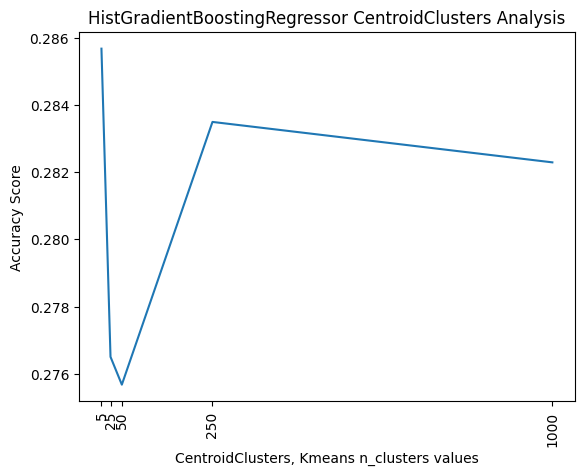

In [55]:
gbr_cc_compressed_results = gbr_cc_compressed_results.reset_index(drop=True)

gbr_cc_best_acc = gbr_cc_compressed_results[(gbr_cc_compressed_results['tokenizer'] == best_acc['tokenizer'].values[0]) & (gbr_cc_compressed_results['vectorizer']== best_acc['vectorizer'].values[0]) & (gbr_cc_compressed_results['resampler']== best_acc['resampler'].values[0])]
gbr_cc_best_acc = gbr_cc_best_acc.sort_values(by='cc_clusters', ascending=True)

plt.plot(gbr_cc_best_acc['cc_clusters'], gbr_cc_best_acc['mean_test_accuracy'])
plt.xticks(gbr_cc_best_acc['cc_clusters'], rotation=90)
plt.xlabel('CentroidClusters, Kmeans n_clusters values')
plt.title('HistGradientBoostingRegressor CentroidClusters Analysis')
plt.ylabel('Accuracy Score')
plt.savefig('../images/hgbr_cc_k_neighbors.png');

In [3]:
# Best results occured with no sampling

cutter = CutTransformer()
hgbr_best_model = HistGradientBoostingRegressor(learning_rate=0.5, max_depth=1000)

hgbr_best_X_train_tokens = column_lemmatizer(X_train)
hgbr_best_X_test_tokens= column_lemmatizer(X_test)

hgbr_best_X_train_vectors, hgbr_best_X_test_vectors = tfidf_vectorize_data(hgbr_best_X_train_tokens, hgbr_best_X_test_tokens)
hgbr_best_X_train_dense = hgbr_best_X_train_vectors.toarray()
hgbr_best_X_test_dense = hgbr_best_X_test_vectors.toarray()

hgbr_best_X_train_sampled, y_train_sampled = Sampler(X=hgbr_best_X_train_dense, y=y_train, state='rOs')
hgbr_best_model.fit(hgbr_best_X_train_sampled, y_train_sampled)

hgbr_train_best_y_pred = hgbr_best_model.predict(hgbr_best_X_train_dense)
hgbr_test_best_y_pred = hgbr_best_model.predict(hgbr_best_X_test_dense)

hgbr_train_best_y_pred_cut = cutter.transform(hgbr_train_best_y_pred)
hgbr_test_best_y_pred_cut = cutter.transform(hgbr_test_best_y_pred)

with open('HGBRBestModel.pkl', 'wb') as model_file:
    pickle.dump(hgbr_best_model, model_file)

NameError: name 'CutTransformer' is not defined

In [2]:
# test pickle

with open('HGBRBestModel.pkl', 'rb') as model_file:
    pickle_test = pickle.load(model_file)

pickle_pred = pickle_test.predict(hgbr_best_X_test_dense)
pickle_pred_cut = cutter.transform(pickle_pred)
print(accuracy_score(y_test, pickle_pred_cut))

NameError: name 'hgbr_best_X_test_dense' is not defined

In [135]:
accuracy_train_hgbr_best = accuracy_score(y_train, hgbr_train_best_y_pred_cut)
precision_train_hgbr_best = precision_score(y_train, hgbr_train_best_y_pred_cut, average='weighted')
recall_train_hgbr_best = recall_score(y_train, hgbr_train_best_y_pred_cut, average='weighted')
f1_train_hgbr_best = f1_score(y_train, hgbr_train_best_y_pred_cut, average='weighted')
r2_train_hgbr_best = r2_score(y_train, hgbr_train_best_y_pred_cut)
mse_train_hgbr_best = mean_squared_error(y_train, hgbr_train_best_y_pred_cut)

accuracy_test_hgbr_best = accuracy_score(y_test, hgbr_test_best_y_pred_cut)
precision_test_hgbr_best = precision_score(y_test, hgbr_test_best_y_pred_cut, average='weighted')
recall_test_hgbr_best = recall_score(y_test, hgbr_test_best_y_pred_cut, average='weighted')
f1_test_hgbr_best = f1_score(y_test, hgbr_test_best_y_pred_cut, average='weighted')
r2_test_hgbr_best = r2_score(y_test, hgbr_test_best_y_pred_cut)
mse_test_hgbr_best = mean_squared_error(y_test, hgbr_test_best_y_pred_cut)

print('Train Results')
print("Accuracy Score: HGBR Regression Train Data (lem - TFIDF):", accuracy_train_hgbr_best)
print("Precision Score: HGBR Regression Train Data (lem - TFIDF):", precision_train_hgbr_best)
print("Recall Score: HGBR Regression Train Data (lem - TFIDF):", recall_train_hgbr_best)
print("F1 Score: HGBR Regression Train Data (lem - TFIDF):", f1_train_hgbr_best)
print("R Squared Score: HGBR Regression Train Data (lem - TFIDF):", r2_train_hgbr_best)
print("Mean Squared Error Score: HGBR Regression Train Data (lem - TFIDF):", mse_train_hgbr_best)
print()
print('Test Results')
print("Accuracy Score: HGBR Regression Test Data (lem - TFIDF):", accuracy_test_hgbr_best)
print("Precision Score: HGBR Regression Test Data (lem - TFIDF):", precision_test_hgbr_best)
print("Recall Score: HGBR Regression Test Data (lem - TFIDF):", recall_test_hgbr_best)
print("F1 Score: HGBR Regression Test Data (lem - TFIDF):", f1_test_hgbr_best)
print("R Squared Score: HGBR Regression Test Data (lem - TFIDF):", r2_test_hgbr_best)
print("Mean Squared Error Score: HGBR Regression Test Data (lem - TFIDF):", mse_test_hgbr_best)

Train Results
Accuracy Score: HGBR Regression Train Data (lem - TFIDF): 0.5444914269783002
Precision Score: HGBR Regression Train Data (lem - TFIDF): 0.7469382481234887
Recall Score: HGBR Regression Train Data (lem - TFIDF): 0.5444914269783002
F1 Score: HGBR Regression Train Data (lem - TFIDF): 0.5819911732108075
R Squared Score: HGBR Regression Train Data (lem - TFIDF): 0.7409353227775499
Mean Squared Error Score: HGBR Regression Train Data (lem - TFIDF): 0.7442033362761954

Test Results
Accuracy Score: HGBR Regression Test Data (lem - TFIDF): 0.396541443053071
Precision Score: HGBR Regression Test Data (lem - TFIDF): 0.6299447912584228
Recall Score: HGBR Regression Test Data (lem - TFIDF): 0.396541443053071
F1 Score: HGBR Regression Test Data (lem - TFIDF): 0.44990235322778127
R Squared Score: HGBR Regression Test Data (lem - TFIDF): 0.4985142421947838
Mean Squared Error Score: HGBR Regression Test Data (lem - TFIDF): 1.4259771236515422


[[2410 2477  707   81    6]
 [  14 1355  120    3    0]
 [  29  347  910  383   30]
 [   6  100  706 1527  588]
 [   3   60  765 3378 5516]]
[[1480 1917 1046  286   45]
 [ 184  446  439  171   36]
 [  75  363  576  349  114]
 [  37  210  652  997  684]
 [  33  293 1313 2885 3816]]


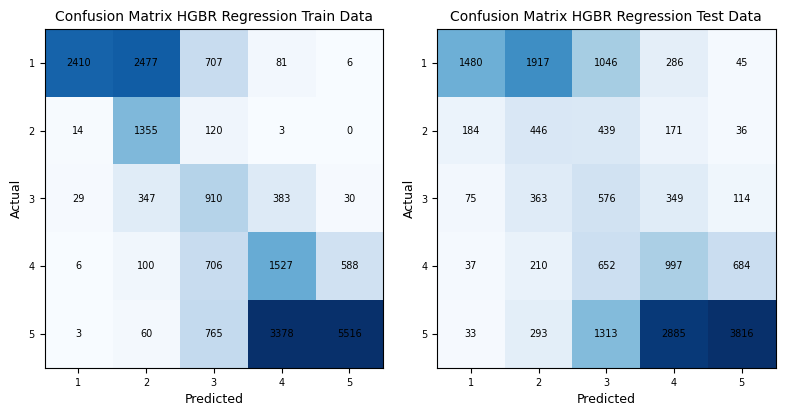

In [136]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, hgbr_train_best_y_pred_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix HGBR Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test, hgbr_test_best_y_pred_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 3000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix HGBR Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/HgbrBestConfMatrix.png')
plt.show()

# Best Model Scatter Analysis

In [3]:
# Investigate spread of data before cutting

# if the predicted results before transformation are widely distributed outside of 1-5, we may be forcing them intyo an S shape and destroying the correlation.

# Similarly if the data is thinly distributes between 1-5, we might be forcing the data into columns that do not match the regression line.

# If the data is roughly distributed between 1-5, but is scattered widely, this tells us that our data may need more preprocessing before we can accurately form a regression line.

# Load the given dataset
df = pd.read_json("../data/Appliances.json", lines = True)
df.head()

df = df.dropna(subset='reviewText')

features = df['reviewText']
target = df['overall']

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features, target, test_size=0.25, random_state=69)
X_train_full = X_train_full[:(int(len(X_train_full) / 2) )]
y_train_full = y_train_full[:(int(len(y_train_full) / 2) )]


In [4]:
hgbr_best_X_train_tokens_full = column_lemmatizer(X_train_full)
hgbr_best_X_test_tokens_full = column_lemmatizer(X_test_full)

hgbr_best_X_train_vectors_full, hgbr_best_X_test_vectors_full = tfidf_vectorize_data(hgbr_best_X_train_tokens_full, hgbr_best_X_test_tokens_full)


In [3]:
rOs = RandomOverSampler()


# Transform the train and test datasets
hgbr_best_X_train_dense_full = hgbr_best_X_train_vectors_full.toarray()

print(hgbr_best_X_train_dense_full.shape)
print(y_train_full.shape)

# hgbr_best_X_train_lem_tfidf_df = pd.DataFrame(hgbr_best_X_train_dense_full)

# hgbr_best_X_train_lem_tfidf_df.to_csv('../data/full_X_train_dense_lem_tfidf.csv', header=False, index=False)

# hgbr_best_X_train_sampled_full, y_train_sampled_full = rOs.fit_resample(hgbr_best_X_train_dense_full, y_train_full)

(225919, 40941)
(225919,)


In [4]:
# hgbr_best_X_train_dense_full = pd.read_csv('../data/full_X_train_dense_lem_tfidf.csv')

# print('csv loaded')

hgbr_best_model_full = HistGradientBoostingRegressor(learning_rate=0.5, max_depth=None, verbose=2)
hgbr_best_model_full.fit(hgbr_best_X_train_dense_full, y_train_full)

with open('HGBRBestModel.pkl', 'wb') as model_file:
    pickle.dump(hgbr_best_model_full, model_file)

Binning 66.595 GB of training data: 558.167 s
Binning 7.400 GB of validation data: 11.165 s
Fitting gradient boosted rounds:
[1/100] 1 tree, 31 leaves, max depth = 27, train loss: 0.66628, val loss: 0.67685, in 5.902s
[2/100] 1 tree, 31 leaves, max depth = 30, train loss: 0.58758, val loss: 0.60075, in 5.998s
[3/100] 1 tree, 31 leaves, max depth = 27, train loss: 0.55150, val loss: 0.56312, in 5.164s
[4/100] 1 tree, 31 leaves, max depth = 29, train loss: 0.52819, val loss: 0.54046, in 4.940s
[5/100] 1 tree, 31 leaves, max depth = 30, train loss: 0.50297, val loss: 0.51525, in 5.759s
[6/100] 1 tree, 31 leaves, max depth = 29, train loss: 0.48907, val loss: 0.50130, in 5.111s
[7/100] 1 tree, 31 leaves, max depth = 30, train loss: 0.47836, val loss: 0.49263, in 5.122s
[8/100] 1 tree, 31 leaves, max depth = 25, train loss: 0.46977, val loss: 0.48464, in 5.137s
[9/100] 1 tree, 31 leaves, max depth = 28, train loss: 0.46230, val loss: 0.47721, in 5.162s
[10/100] 1 tree, 31 leaves, max depth 

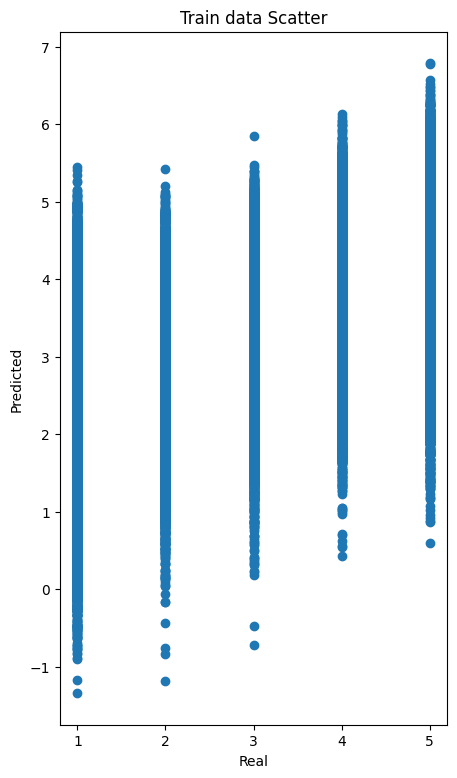

In [176]:
train_full = pd.read_csv('HGBRHalfDataTrainPred.csv')

y_pred_train_full = train_full['Predicted']
y_train_full = train_full['Real']

# y_pred_train_full = hgbr_best_model_full.predict(hgbr_best_X_train_dense_full)

plt.figure(figsize=(5,9))
plt.scatter(x=y_train_full, y=y_pred_train_full)
plt.ylabel('Predicted')
plt.xlabel('Real')
plt.xticks([1, 2, 3, 4, 5])
plt.title('Train data Scatter')
plt.savefig('../images/HGBRBestScatterTrain.jpg');

<Figure size 1600x800 with 0 Axes>

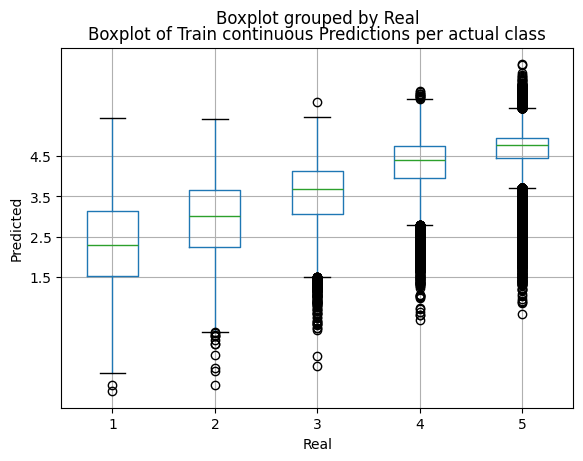

In [177]:
# The graph tells us quite a lot, lets translate it into boxplots

train_pred_data = {
    'Predicted': y_pred_train_full,
    'Real': y_train_full
}

train_corr_df = pd.DataFrame(train_pred_data)

train_corr_df.head()

plt.figure(figsize=(16,8))
train_corr_df.boxplot(column='Predicted', by='Real')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.yticks([1.5, 2.5, 3.5, 4.5])
plt.title('Boxplot of Train continuous Predictions per actual class')
plt.savefig('../images/BoxplotTrainCont.png');

In [178]:
y_pred_train_grouped = train_corr_df.groupby(train_corr_df['Real'])
y_pred_train_grouped.describe()

Predicted                                                              \
         count      mean       std       min       25%       50%       75%   
Real                                                                         
1      22668.0  2.319431  1.071573 -1.342860  1.519275  2.281072  3.130917   
2       7763.0  2.935196  0.934411 -1.184985  2.254414  3.004333  3.664756   
3      11449.0  3.556515  0.809153 -0.722957  3.071905  3.681321  4.120670   
4      28164.0  4.288009  0.637154  0.425117  3.958381  4.414736  4.741551   
5     155875.0  4.667904  0.485806  0.589708  4.450696  4.782768  4.948947   

                
           max  
Real            
1     5.450088  
2     5.418594  
3     5.850329  
4     6.127875  
5     6.786409

In [179]:
cutter = CutTransformer()

y_pred_train_full_cut = cutter.transform(y_pred_train_full)

train_acc = accuracy_score(y_train_full, y_pred_train_full_cut)
train_pre = precision_score(y_train_full, y_pred_train_full_cut, average='weighted')
train_rec = recall_score(y_train_full, y_pred_train_full_cut, average='weighted')
train_f1 = f1_score(y_train_full, y_pred_train_full_cut, average='weighted')
train_r2 = r2_score(y_train_full, y_pred_train_full_cut)
train_mse = mean_squared_error(y_train_full, y_pred_train_full_cut)

print('Train Results')
print("Accuracy Score: HGBR Train Data (lem - TFIDF):", train_acc)
print("Precision Score: HGBR Train Data (lem - TFIDF):", train_pre)
print("Recall Score: HGBR Data (lem - TFIDF):", train_rec)
print("F1 Score: HGBR Train Data (lem - TFIDF):", train_f1)
print("R Squared Score: HGBR Train Data (lem - TFIDF):", train_r2)
print("Mean Squared Error Score: HGBR Train Data (lem - TFIDF):", train_mse)

Train Results
Accuracy Score: HGBR Train Data (lem - TFIDF): 0.6037473607797484
Precision Score: HGBR Train Data (lem - TFIDF): 0.740204663467319
Recall Score: HGBR Data (lem - TFIDF): 0.6037473607797484
F1 Score: HGBR Train Data (lem - TFIDF): 0.6419855271153367
R Squared Score: HGBR Train Data (lem - TFIDF): 0.5630530272075958
Mean Squared Error Score: HGBR Train Data (lem - TFIDF): 0.7465064912645683


In [180]:
train_corr_df.to_csv('HGBRHalfDataTrainPred.csv', index=False)

In [181]:
# with open('HGBRBestModel.pkl', 'rb') as model_file:
#     hgbr_best_model_full = pickle.load(model_file)

# hgbr_best_X_test_dense = hgbr_best_X_test_vectors_full.toarray()

# y_pred_test_full = hgbr_best_model_full.predict(hgbr_best_X_test_dense)

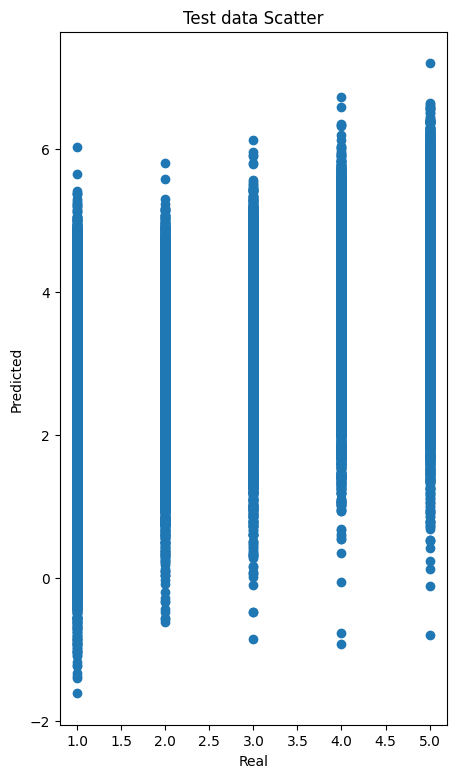

In [182]:
test_full = pd.read_csv('HGBRHalfDataTestPred.csv')

y_pred_test_full = test_full['Predicted']

y_test_full = test_full['Real']

plt.figure(figsize=(5,9))
plt.scatter(x=y_test_full, y=y_pred_test_full)
plt.ylabel('Predicted')
plt.xlabel('Real')
plt.title('Test data Scatter')
plt.savefig('../images/HGBRBestScatterTest.jpg');

<Figure size 1600x800 with 0 Axes>

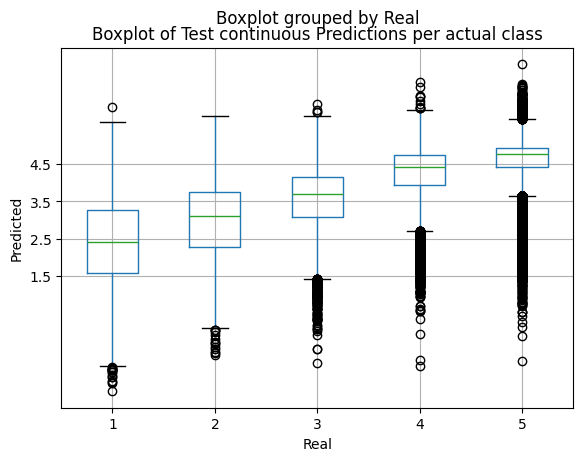

In [183]:
test_pred_data = {
    'Predicted': y_pred_test_full,
    'Real': y_test_full
}

test_corr_df = pd.DataFrame(test_pred_data)

test_corr_df.head()

plt.figure(figsize=(16,8))
test_corr_df.boxplot(column='Predicted', by='Real')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.yticks([1.5, 2.5, 3.5, 4.5])
plt.title('Boxplot of Test continuous Predictions per actual class')
plt.savefig('../images/BoxplotTestCont.png');

In [184]:
y_pred_test_grouped = test_corr_df.groupby(test_corr_df['Real'])
y_pred_test_grouped.describe()

Predicted                                                              \
         count      mean       std       min       25%       50%       75%   
Real                                                                         
1      14801.0  2.405879  1.132597 -1.609876  1.586876  2.413986  3.280573   
2       5168.0  2.983064  0.988925 -0.621510  2.279685  3.102852  3.745393   
3       7630.0  3.559332  0.874442 -0.855925  3.070185  3.705298  4.167770   
4      18878.0  4.271747  0.689866 -0.915298  3.932332  4.420515  4.752947   
5     104137.0  4.652030  0.524896 -0.799018  4.431131  4.778780  4.949139   

                
           max  
Real            
1     6.030575  
2     5.802302  
3     6.125250  
4     6.719652  
5     7.194513

In [185]:
cutter = CutTransformer()

y_pred_test_full_cut = cutter.transform(y_pred_test_full)

test_acc = accuracy_score(y_test_full, y_pred_test_full_cut)
test_pre = precision_score(y_test_full, y_pred_test_full_cut, average='weighted')
test_rec = recall_score(y_test_full, y_pred_test_full_cut, average='weighted')
test_f1 = f1_score(y_test_full, y_pred_test_full_cut, average='weighted')
test_r2 = r2_score(y_test_full, y_pred_test_full_cut)
test_mse = mean_squared_error(y_test_full, y_pred_test_full_cut)

print('Train Results')
print("Accuracy Score: HGBR Train Data (lem - TFIDF):", test_acc)
print("Precision Score: HGBR Train Data (lem - TFIDF):", test_pre)
print("Recall Score: HGBR Data (lem - TFIDF):", test_rec)
print("F1 Score: HGBR Train Data (lem - TFIDF):", test_f1)
print("R Squared Score: HGBR Train Data (lem - TFIDF):", test_r2)
print("Mean Squared Error Score: HGBR Train Data (lem - TFIDF):", test_mse)

Train Results
Accuracy Score: HGBR Train Data (lem - TFIDF): 0.5930789966404185
Precision Score: HGBR Train Data (lem - TFIDF): 0.7279769433886003
Recall Score: HGBR Data (lem - TFIDF): 0.5930789966404185
F1 Score: HGBR Train Data (lem - TFIDF): 0.6318797664395106
R Squared Score: HGBR Train Data (lem - TFIDF): 0.5087555838216788
Mean Squared Error Score: HGBR Train Data (lem - TFIDF): 0.8286613462227947


In [186]:
test_corr_df.to_csv('HGBRHalfDataTestPred.csv', index=False)

[[  5523   7386   6126   3370    263]
 [   571   1954   2806   2253    179]
 [   172   1124   3476   5471   1206]
 [    35    445   2683  12384  12617]
 [    38    441   3936  38399 113061]]
[[ 3316  4496  4125  2606   258]
 [  418  1175  1773  1614   188]
 [  190   777  2144  3593   926]
 [   75   383  1921  7915  8584]
 [   72   538  3200 25551 74776]]


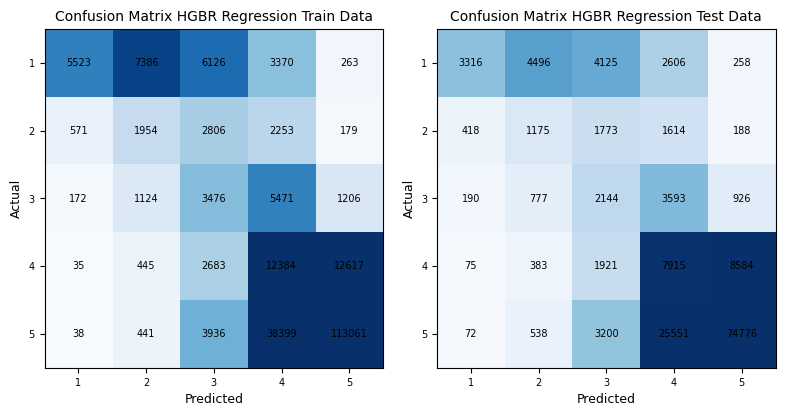

In [187]:
train_full = pd.read_csv('HGBRHalfDataTrainPred.csv')
test_full = pd.read_csv('HGBRHalfDataTestPred.csv')

y_pred_train_full = train_full['Predicted']
y_pred_test_full = test_full['Predicted']

y_train_full = train_full['Real']
y_test_full = test_full['Real']

cutter = CutTransformer()

y_pred_train_full_cut = cutter.transform(y_pred_train_full)
y_pred_test_full_cut = cutter.transform(y_pred_test_full)

# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train_full, y_pred_train_full_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 8000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix HGBR Regression Train Data', fontsize=10)

cm = confusion_matrix(y_test_full, y_pred_test_full_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 8000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix HGBR Regression Test Data', fontsize=10)
plt.tight_layout()
plt.savefig('../images/HgbrBestFullConfMatrix.png')
plt.show()

In [188]:
train_full = pd.read_csv('HGBRHalfDataTrainPred.csv')
test_full = pd.read_csv('HGBRHalfDataTestPred.csv')

print(train_full.describe())

           Predicted           Real
count  225919.000000  225919.000000
mean        4.269045       4.269548
std         0.984827       1.307084
min        -1.342860       1.000000
25%         3.989193       4.000000
50%         4.623312       5.000000
75%         4.904833       5.000000
max         6.786409       5.000000


In [189]:
predicted_mean = train_full['Predicted'].mean()
real_mean = train_full['Real'].mean()

trans_train_full = pd.DataFrame()

trans_train_full['Predicted'] = train_full['Predicted'] - predicted_mean
trans_train_full['Real'] = train_full['Real'] - real_mean

print(train_full.describe())


           Predicted           Real
count  225919.000000  225919.000000
mean        4.269045       4.269548
std         0.984827       1.307084
min        -1.342860       1.000000
25%         3.989193       4.000000
50%         4.623312       5.000000
75%         4.904833       5.000000
max         6.786409       5.000000


In [190]:
mean_df = trans_train_full.groupby(trans_train_full['Real']).mean().reset_index()

abs_mean_df = mean_df.abs()
print(mean_df)


       Real  Predicted
0 -3.269548  -1.949614
1 -2.269548  -1.333849
2 -1.269548  -0.712530
3 -0.269548   0.018965
4  0.730452   0.398859


In [191]:
magnitude = []
magnitude =  abs_mean_df['Real'] / abs_mean_df['Predicted']
magnitude = magnitude.tolist()
print(magnitude)
magnitude.pop(3)

magnitude = np.average(magnitude)
print(magnitude)
trans_train_full['new_pred'] = trans_train_full['Predicted'] * magnitude

train_full['Predicted'] = trans_train_full['new_pred'] + predicted_mean

[1.6770230869778404, 1.7015034102081574, 1.7817459069964332, 14.213252913806633, 1.831353648989033]
1.7479065132928662


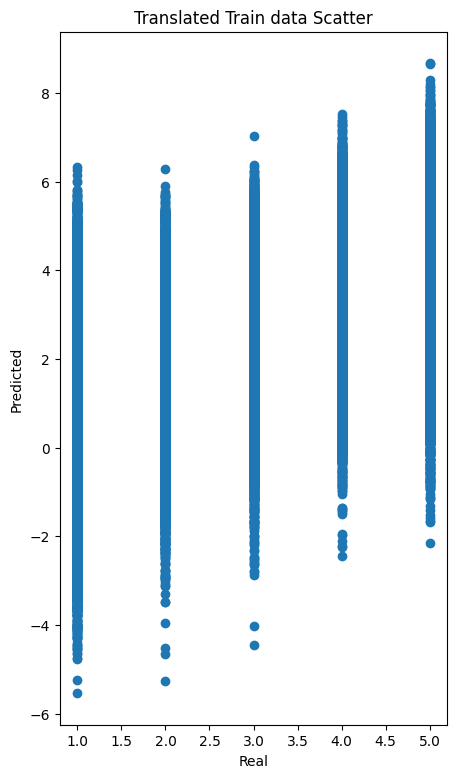

In [193]:
trans_y_pred_train_full = train_full['Predicted']

y_train_full = train_full['Real']

plt.figure(figsize=(5,9))
plt.scatter(x=y_train_full, y=trans_y_pred_train_full)
plt.ylabel('Predicted')
plt.xlabel('Real')
plt.title('Translated Train data Scatter')
plt.savefig('../images/TranslatedScatterTrain.jpg');

   Predicted  Real                    dataset
0   4.913182     5  Original Model Prediction
1   3.039268     5  Original Model Prediction
2   4.861037     5  Original Model Prediction
3   5.115838     5  Original Model Prediction
4   3.080877     4  Original Model Prediction


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

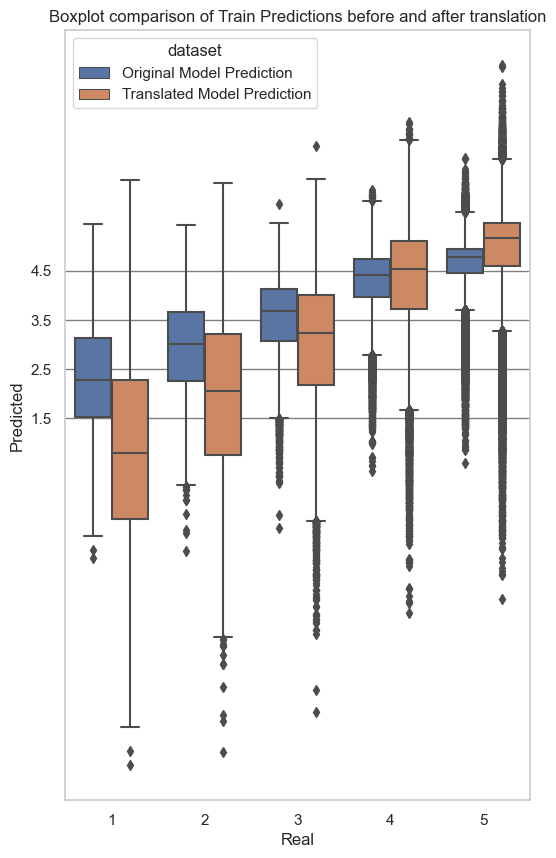

In [217]:
train_combined_df = pd.concat([train_corr_df.assign(dataset='Original Model Prediction'), train_full.assign(dataset='Translated Model Prediction')])

print(train_combined_df.head())

plt.figure(figsize=(6,10))
sns.boxplot(x='Real', y='Predicted', hue='dataset', data=train_combined_df)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.yticks([1.5, 2.5, 3.5, 4.5])
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.title('Boxplot comparison of Train Predictions before and after translation')
plt.savefig('../images/BoxplotTranslatedTrainCont.png');

In [195]:
cutter = CutTransformer()

trans_y_pred_train_full_cut = cutter.transform(trans_y_pred_train_full)

train_acc = accuracy_score(y_train_full, trans_y_pred_train_full_cut)
train_pre = precision_score(y_train_full, trans_y_pred_train_full_cut, average='weighted')
train_rec = recall_score(y_train_full, trans_y_pred_train_full_cut, average='weighted')
train_f1 = f1_score(y_train_full, trans_y_pred_train_full_cut, average='weighted')
train_r2 = r2_score(y_train_full, trans_y_pred_train_full_cut)
train_mse = mean_squared_error(y_train_full, trans_y_pred_train_full_cut)

print('Translated Train Results')
print("Accuracy Score: HGBR Translated Train Data (lem - TFIDF):", train_acc)
print("Precision Score: HGBR Translated Train Data (lem - TFIDF):", train_pre)
print("Recall Score: HGBR Translated Train Data (lem - TFIDF):", train_rec)
print("F1 Score: HGBR Translated Train Data (lem - TFIDF):", train_f1)
print("R Squared Score: HGBR Translated Train Data (lem - TFIDF):", train_r2)
print("Mean Squared Error Score: HGBR Translated Train Data (lem - TFIDF):", train_mse)

Translated Train Results
Accuracy Score: HGBR Translated Train Data (lem - TFIDF): 0.6521319587993927
Precision Score: HGBR Translated Train Data (lem - TFIDF): 0.7163237935373274
Recall Score: HGBR Translated Train Data (lem - TFIDF): 0.6521319587993927
F1 Score: HGBR Translated Train Data (lem - TFIDF): 0.6799002827923205
R Squared Score: HGBR Translated Train Data (lem - TFIDF): 0.5426733954970411
Mean Squared Error Score: HGBR Translated Train Data (lem - TFIDF): 0.7813242799410408


In [196]:
test_full_trans = test_full['Predicted']
 
test_full_trans -= predicted_mean

test_full_trans *= magnitude

test_full_trans += predicted_mean

test_full['Predicted'] = test_full_trans

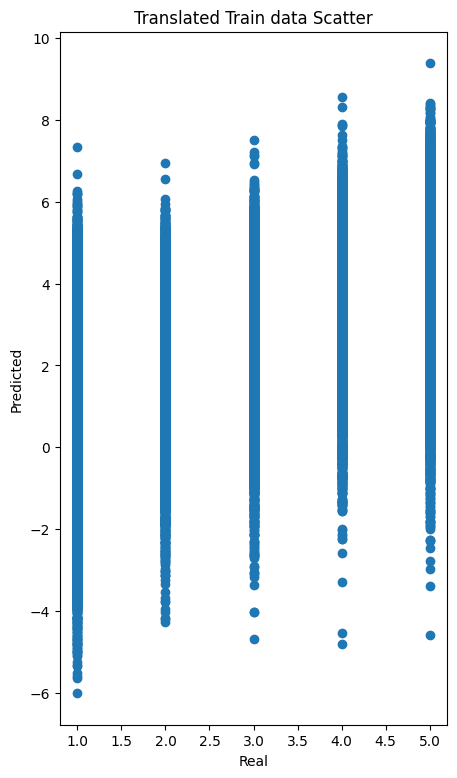

In [197]:
y_test_full = test_full['Real']

plt.figure(figsize=(5,9))
plt.scatter(x=y_test_full, y=test_full_trans)
plt.ylabel('Predicted')
plt.xlabel('Real')
plt.title('Translated Train data Scatter')
plt.savefig('../images/TranslatedTestScatterTest.jpg');

   Predicted  Real                    dataset
0   4.913182     5  Original Model Prediction
1   3.039268     5  Original Model Prediction
2   4.861037     5  Original Model Prediction
3   5.115838     5  Original Model Prediction
4   3.080877     4  Original Model Prediction


c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categ

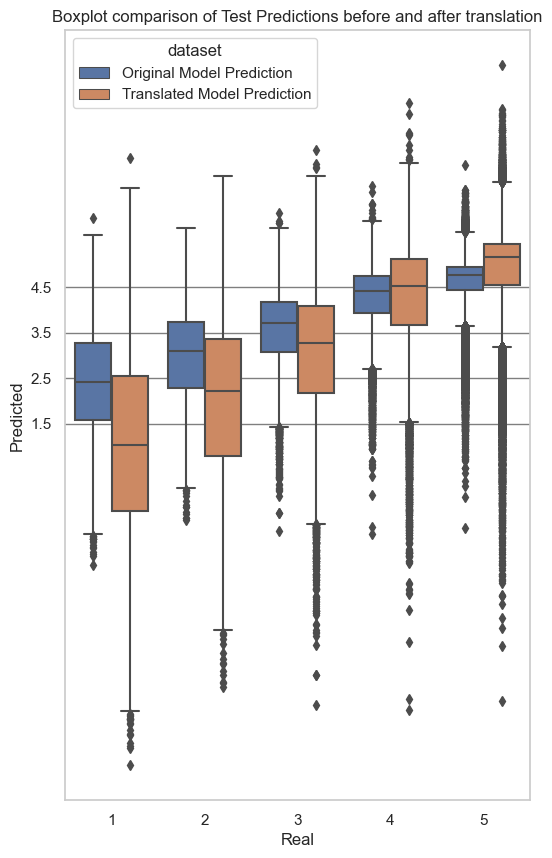

In [218]:
test_combined_df = pd.concat([test_corr_df.assign(dataset='Original Model Prediction'), test_full.assign(dataset='Translated Model Prediction')])

print(train_combined_df.head())

plt.figure(figsize=(6,10))
sns.boxplot(x='Real', y='Predicted', hue='dataset', data=test_combined_df)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.yticks([1.5, 2.5, 3.5, 4.5])
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.title('Boxplot comparison of Test Predictions before and after translation')
plt.savefig('../images/BoxplotTranslatedTestCont.png');

In [199]:
cutter = CutTransformer()

test_full_trans_cut = cutter.transform(test_full_trans)

test_acc = accuracy_score(y_test_full, test_full_trans_cut)
test_pre = precision_score(y_test_full, test_full_trans_cut, average='weighted')
test_rec = recall_score(y_test_full, test_full_trans_cut, average='weighted')
test_f1 = f1_score(y_test_full, test_full_trans_cut, average='weighted')
test_r2 = r2_score(y_test_full, test_full_trans_cut)
test_mse = mean_squared_error(y_test_full, test_full_trans_cut)

print('Translated Test Results')
print("Accuracy Score: HGBR Translated Test Data (lem - TFIDF):", test_acc)
print("Precision Score: HGBR Translated Test Data (lem - TFIDF):", test_pre)
print("Recall Score: HGBR Translated Test Data (lem - TFIDF):", test_rec)
print("F1 Score: HGBR Translated Test Data (lem - TFIDF):", test_f1)
print("R Squared Score: HGBR Translated Test Data (lem - TFIDF):", test_r2)
print("Mean Squared Error Score: HGBR Translated Test Data (lem - TFIDF):", test_mse)

Translated Test Results
Accuracy Score: HGBR Translated Test Data (lem - TFIDF): 0.6391039345611962
Precision Score: HGBR Translated Test Data (lem - TFIDF): 0.705907832232381
Recall Score: HGBR Translated Test Data (lem - TFIDF): 0.6391039345611962
F1 Score: HGBR Translated Test Data (lem - TFIDF): 0.6680010675077391
R Squared Score: HGBR Translated Test Data (lem - TFIDF): 0.4679668051788358
Mean Squared Error Score: HGBR Translated Test Data (lem - TFIDF): 0.8974663709880888


[[ 14193   3515   2863   1735    362]
 [  2988   1579   1715   1211    270]
 [  1679   1959   2947   3323   1541]
 [   666   1352   3569   8315  14262]
 [   738   1796   6584  26462 120295]]
[[ 8600  2409  2069  1397   326]
 [ 1871  1011  1163   868   255]
 [ 1189  1181  1949  2137  1174]
 [  633   910  2464  5218  9653]
 [  853  1482  4788 17534 79480]]


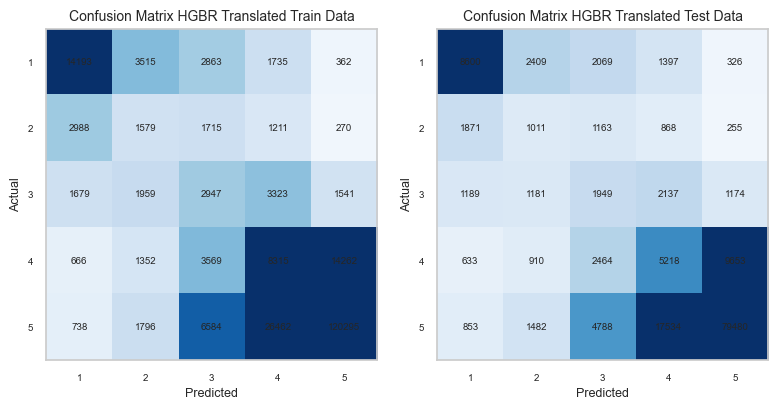

In [222]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train_full, trans_y_pred_train_full_cut)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 8000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.grid(False)
plt.title(f'Confusion Matrix HGBR Translated Train Data', fontsize=10)

cm = confusion_matrix(y_test_full, test_full_trans_cut)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 8000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix HGBR Translated Test Data', fontsize=10)
plt.tight_layout()
plt.grid(False)
plt.savefig('../images/HgbrTranslatedBestFullConfMatrix.png')
plt.show();